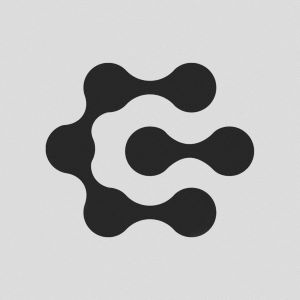

#Importing Liberaries & Reading the Dataset

In [ ]:
!pip install sounddevice


In [ ]:
!apt-get install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0
!pip install pyaudio




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
libportaudio2 is already the newest version (19.6.0-1.1).
libportaudiocpp0 is already the newest version (19.6.0-1.1).
portaudio19-dev is already the newest version (19.6.0-1.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from scipy.stats import shapiro
from sklearn.feature_selection import SelectKBest, f_classif
# Import necessary libraries
import tkinter as tk
import wave
from scipy.io.wavfile import write

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')




In [ ]:
df=pd.read_csv("voice.csv")

#Quick view

In [ ]:
#First Look
df.head(10)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
5  0.132786  0.079557  0.119090  0.067958  0.209592  0.141634   1.932562   
6  0.150762  0.074463  0.160106  0.092899  0.205718  0.112819   1.530643   
7  0.160514  0.076767  0.144337  0.110532  0.231962  0.121430   1.397156   
8  0.142239  0.078018  0.138587  0.088206  0.208587  0.120381   1.099746   
9  0.134329  0.080350  0.121451  0.075580  0.201957  0.126377   1.190368   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
5     8.308895  0.963181  0.738307  ...  0.132786  0.110132  0.017112   
6     5.987498  0.967573  0.762638  ...  0.150762  0.105945  0.026230   
7     4.766611  0.959255  0.719858  ...  0.160514  0.093052  0.017758   
8     4.070284  0.970723  0.770992  ...  0.142239  0.096729  0.017957   
9     4.787310  0.975246  0.804505  ...  0.134329  0.105881  0.019300   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  
5  0.253968  0.298222  0.007812  2.726562  2.718750  0.125160   male  
6  0.266667  0.479620  0.007812  5.312500  5.304688  0.123992   male  
7  0.144144  0.301339  0.007812  0.539062  0.531250  0.283937   male  
8  0.250000  0.336476  0.007812  2.164062  2.156250  0.148272   male  
9  0.262295  0.340365  0.015625  4.695312  4.679688  0.089920   male  

[10 rows x 21 columns]

**we can see the explanation about each column as follow:**

**meanfreq:** Mean frequency (in kHz) of the voice signal.

**sd:** Standard deviation of the frequency.

**median:** Median frequency (in kHz).\

**Q25:** First quantile (25th percentile) of the frequency distribution.

**Q75:** Third quantile (75th percentile) of the frequency distribution.

**IQR:** Interquartile range, the difference between the 75th and 25th percentiles.

**skew:** Skewness of the frequency distribution.

**kurt:** Kurtosis of the frequency distribution.

**sp.ent:** Spectral entropy, a measure of signal complexity.

**sfm:** Spectral flatness measure, indicating how flat or peaky the spectrum is.

**mode:** Mode frequency, the frequency with the highest occurrence.

**centroid:** Frequency centroid, the weighted average frequency.

**meanfun:** Mean fundamental frequency, a measure of voice pitch.

**minfun:** Minimum fundamental frequency.

**maxfun:** Maximum fundamental frequency.

**meandom:** Mean dominant frequency, a measure of voice pitch variation.

**mindom:** Minimum dominant frequency.

**maxdom:** Maximum dominant frequency.

**dfrange:** Frequency range, the difference between maximum and minimum dominant frequency.

**modindx:** Modulation index, a measure of voice modulation.

**label:** Target variable indicating the gender (e.g., male or female) associated with each recording.

In [ ]:
#Let's see some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
#Checking it's size
df.shape

(3168, 21)

In [ ]:
#Let's check the datatypes
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

we can conclude that we have the target variable (label) which determines the voice is for a female or for a male human.

In [ ]:
#A target is binary classification or more ?
df['label'].nunique()

2

Okay,we have 2 unique values (male and femal)

In [ ]:
#Let's see their counts
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

They have almost equal values ! we will see that visually in the analysis⏳

In [ ]:
#Data inspection
df.describe().T

count       mean         std       min       25%       50%  \
meanfreq  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd        3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
median    3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q25       3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q75       3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR       3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew      3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt      3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent    3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm       3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
mode      3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroid  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
meanfun   3168.0   0.142807    0.032304  0.055565  0.116998  0.140519   
minfun    3168.0   0.036802    0.019220  0.009775  0.018223  0.046110   
maxfun    3168.0   0.258842    0.030077  0.103093  0.253968  0.271186   
meandom   3168.0   0.829211    0.525205  0.007812  0.419828  0.765795   
mindom    3168.0   0.052647    0.063299  0.004883  0.007812  0.023438   
maxdom    3168.0   5.047277    3.521157  0.007812  2.070312  4.992188   
dfrange   3168.0   4.994630    3.520039  0.000000  2.044922  4.945312   
modindx   3168.0   0.173752    0.119454  0.000000  0.099766  0.139357   

                75%          max  
meanfreq   0.199146     0.251124  
sd         0.067020     0.115273  
median     0.210618     0.261224  
Q25        0.175939     0.247347  
Q75        0.243660     0.273469  
IQR        0.114175     0.252225  
skew       2.931694    34.725453  
kurt      13.648905  1309.612887  
sp.ent     0.928713     0.981997  
sfm        0.533676     0.842936  
mode       0.221104     0.280000  
centroid   0.199146     0.251124  
meanfun    0.169581     0.237636  
minfun     0.047904     0.204082  
maxfun     0.277457     0.279114  
meandom    1.177166     2.957682  
mindom     0.070312     0.458984  
maxdom     7.007812    21.867188  
dfrange    6.992188    21.843750  
modindx    0.209183     0.932374

This dataset needs scaling we will see later.

#Analysis

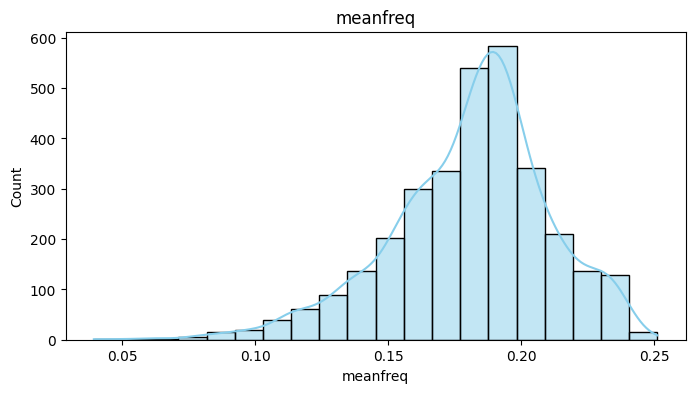

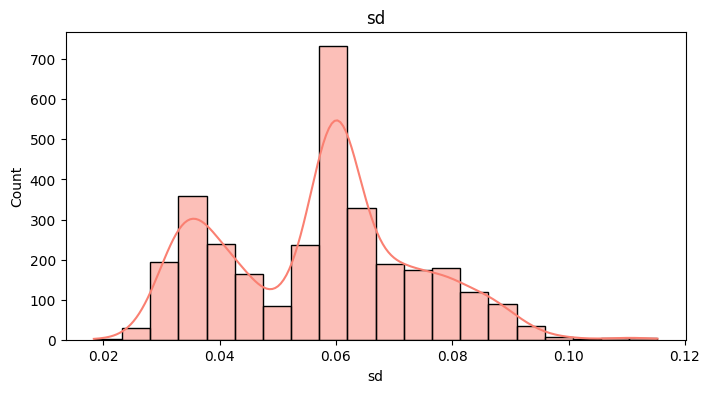

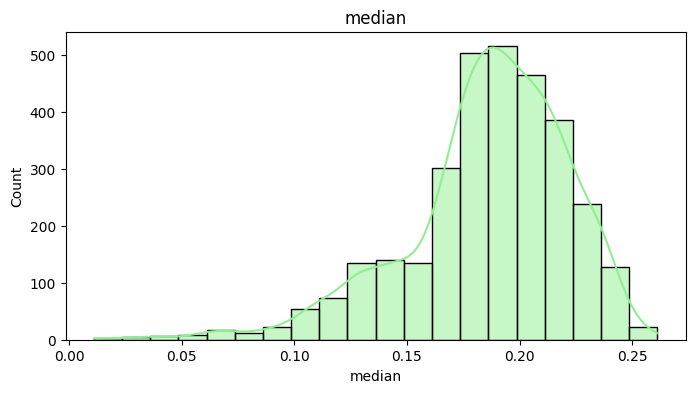

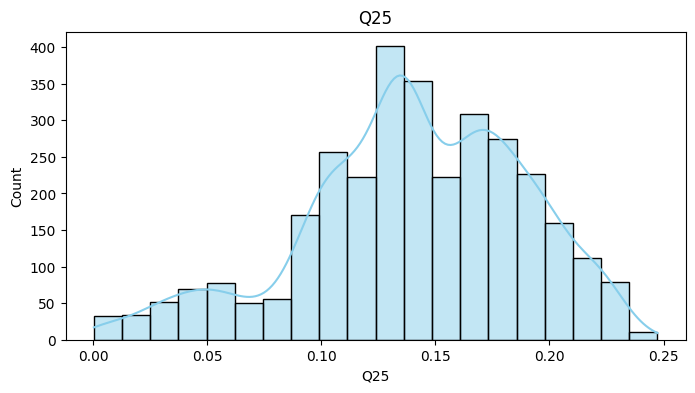

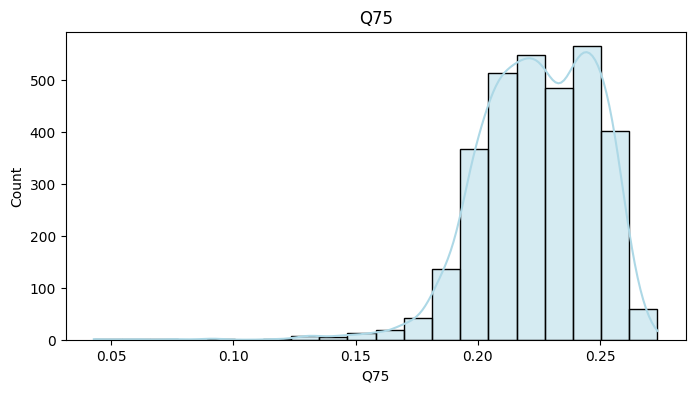

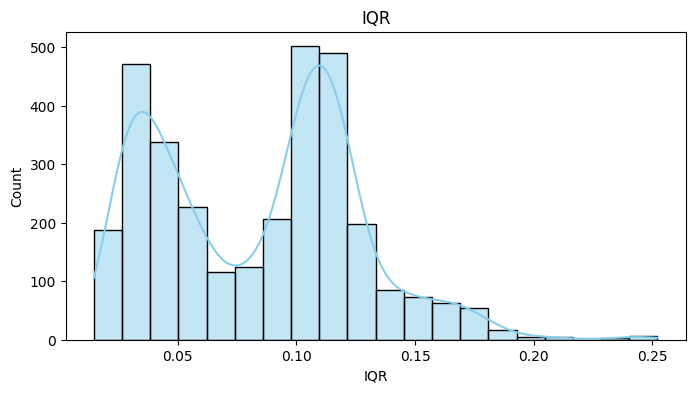

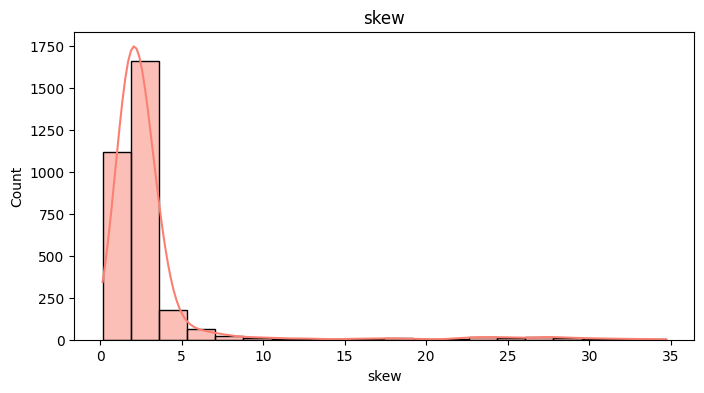

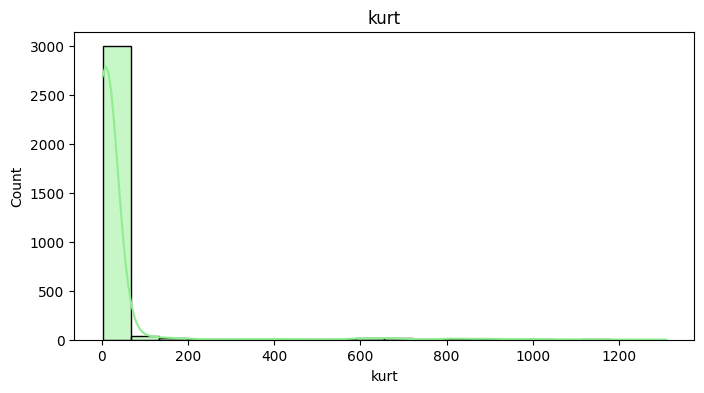

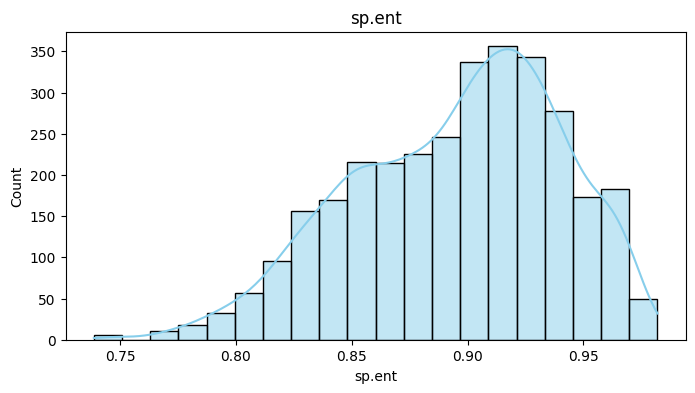

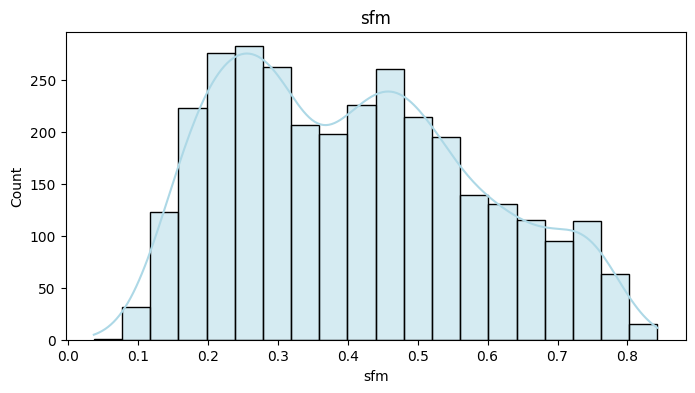

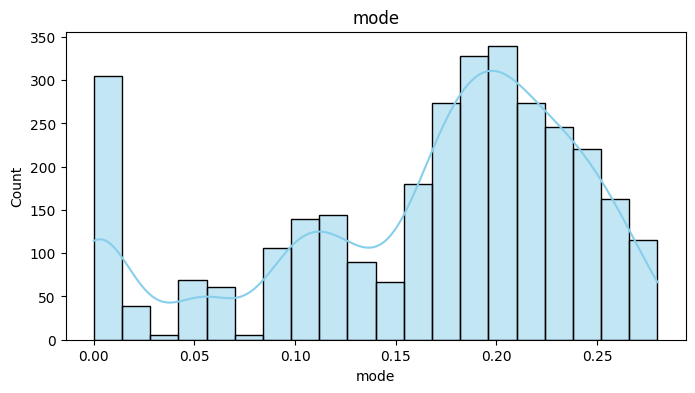

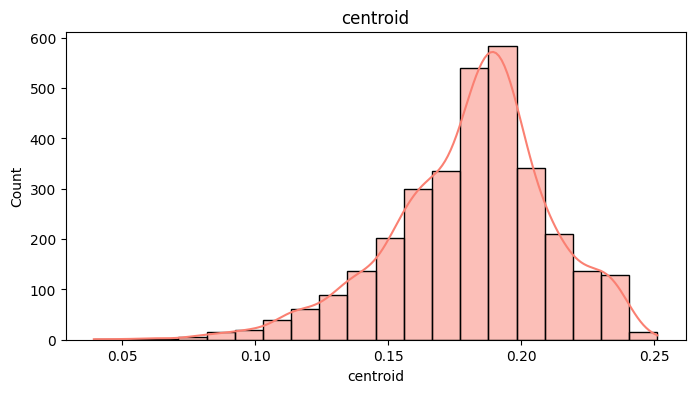

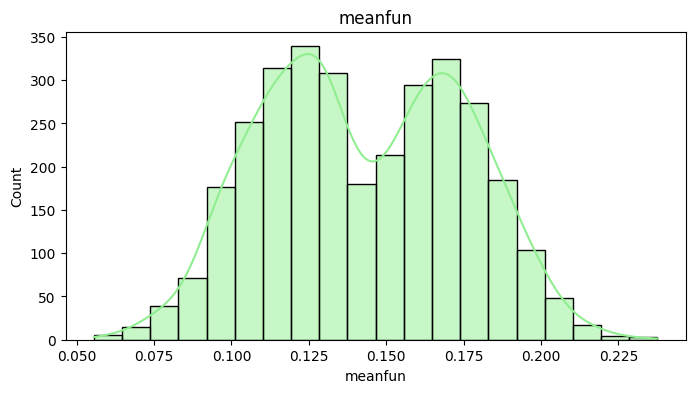

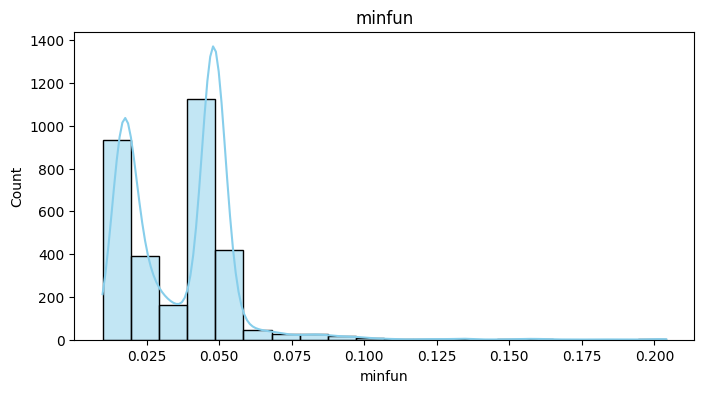

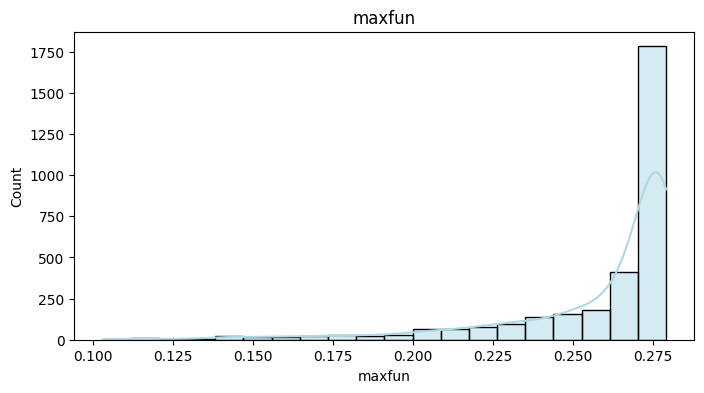

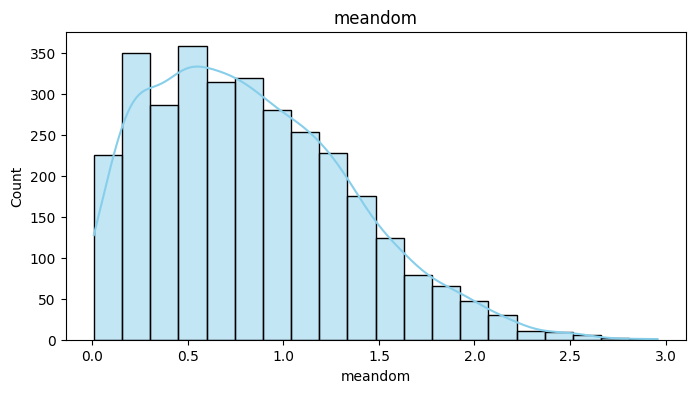

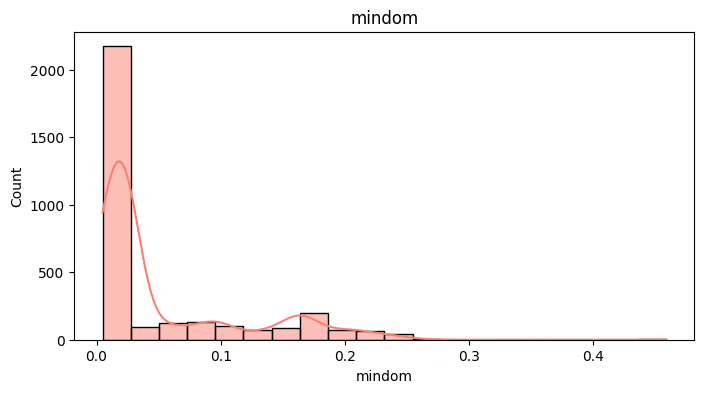

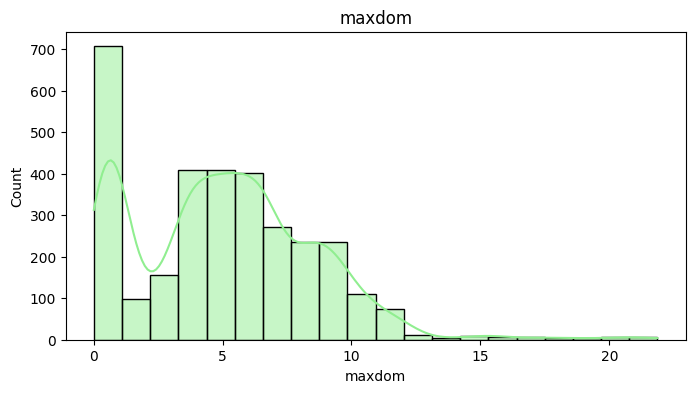

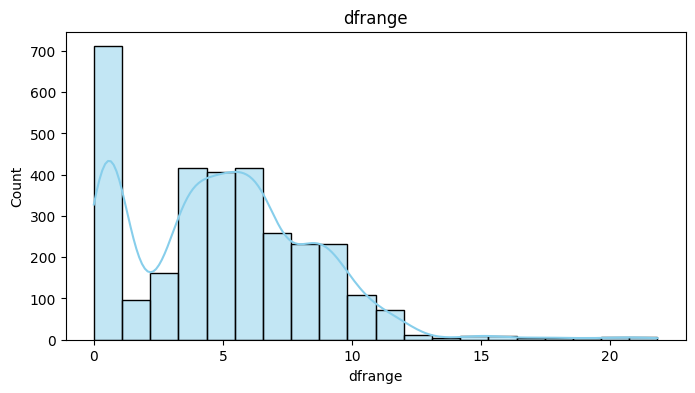

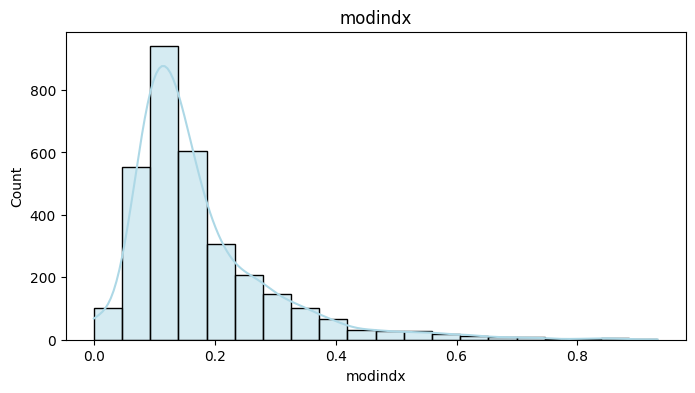

In [ ]:
#Let's see the data distribution
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'lightblue']
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(col)
    plt.show()


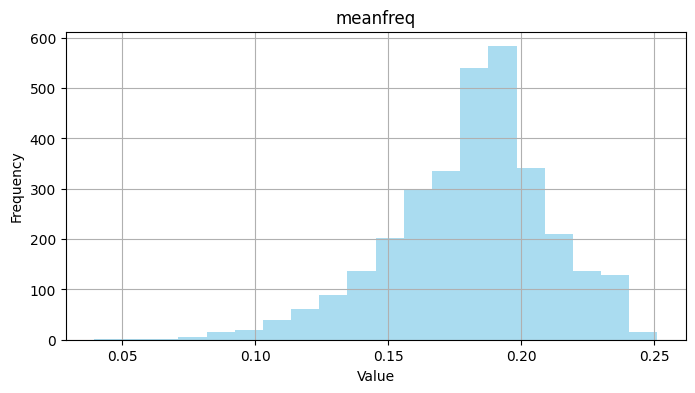

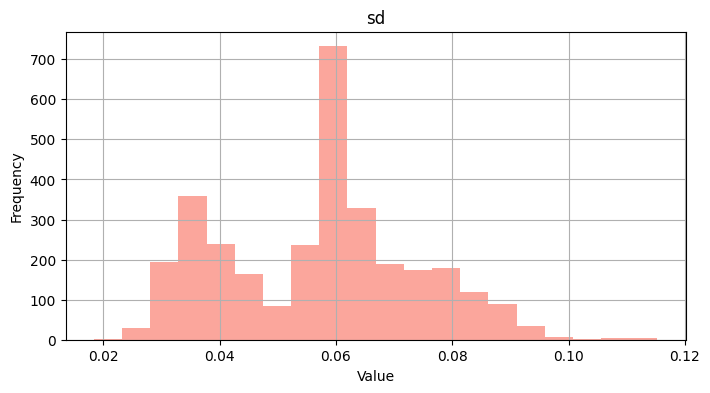

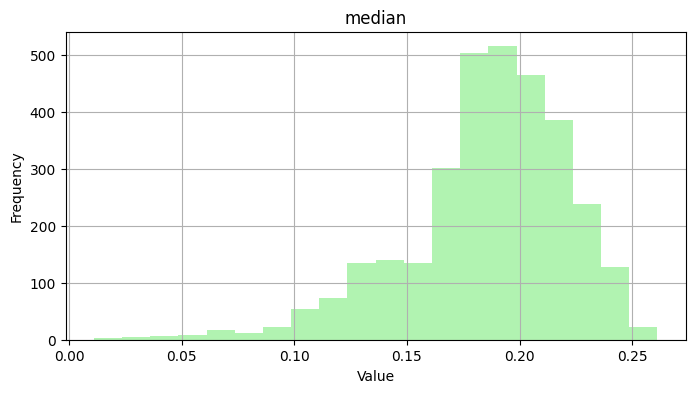

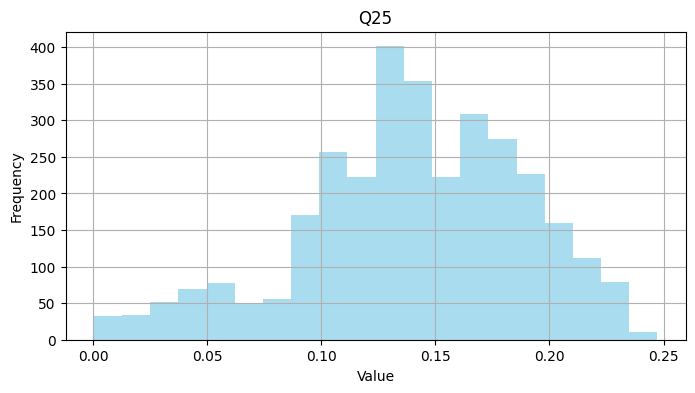

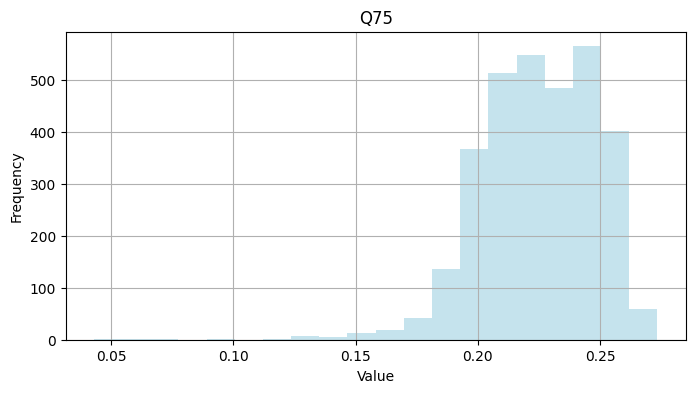

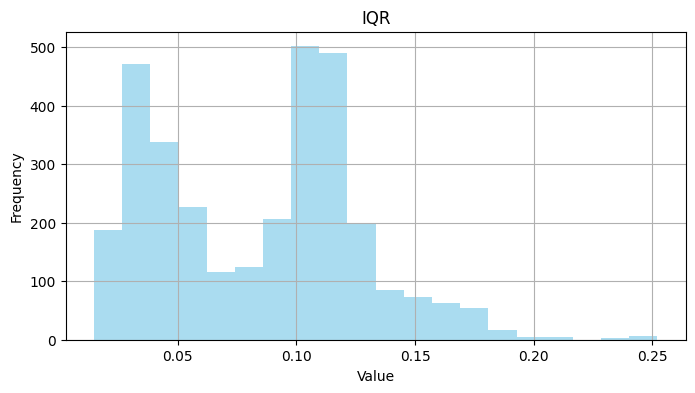

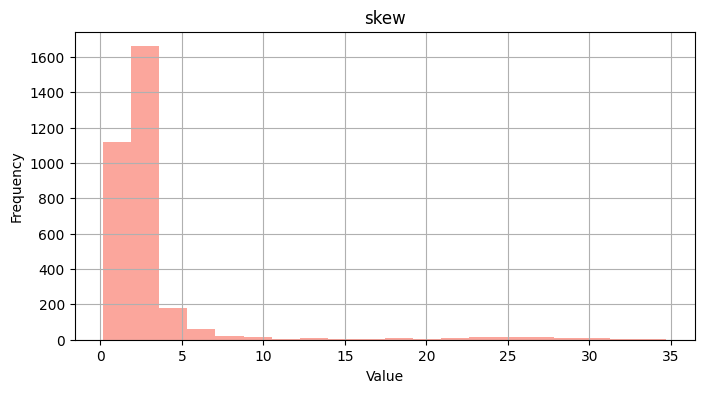

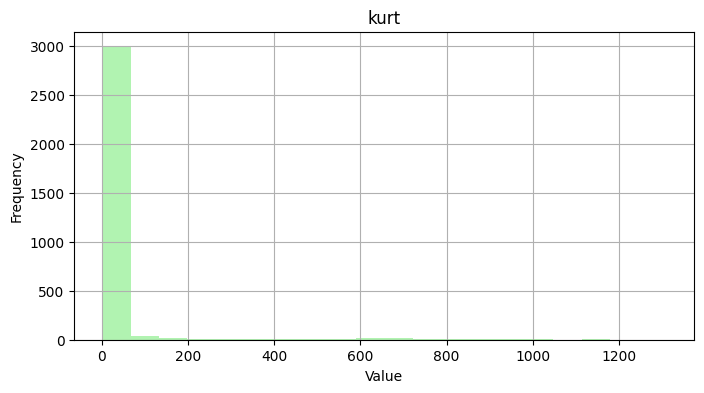

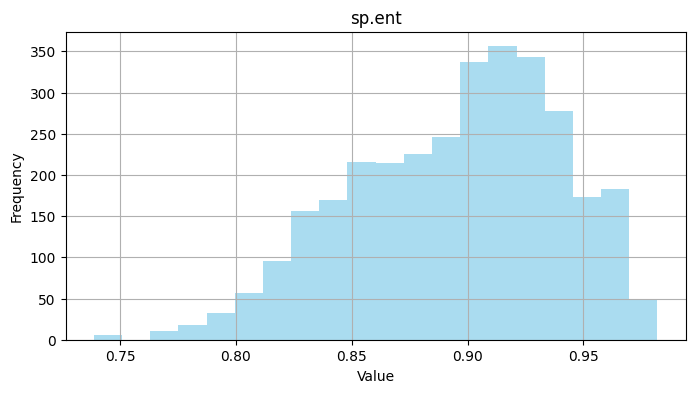

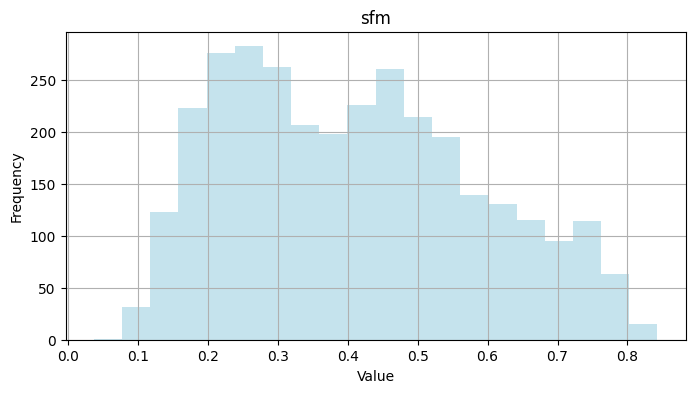

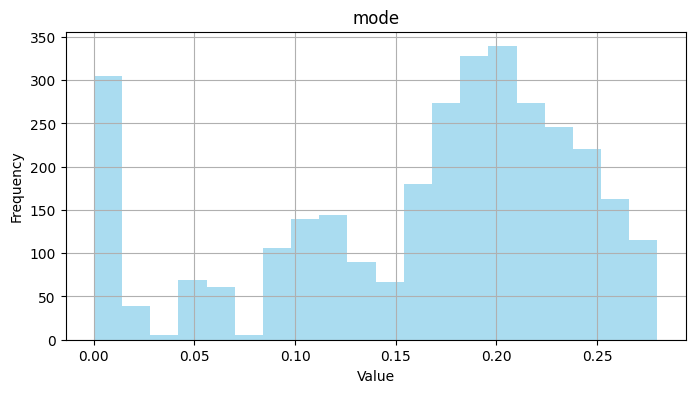

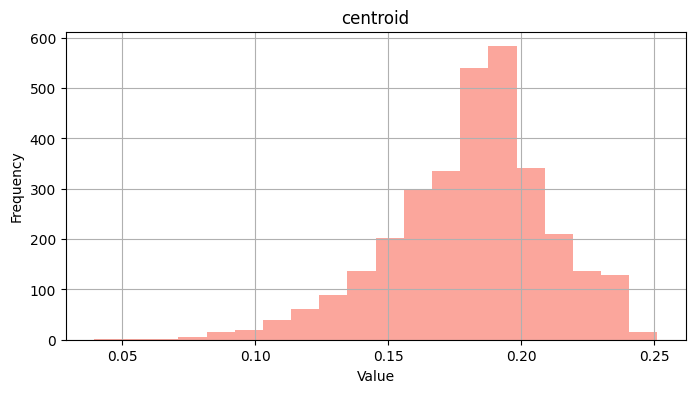

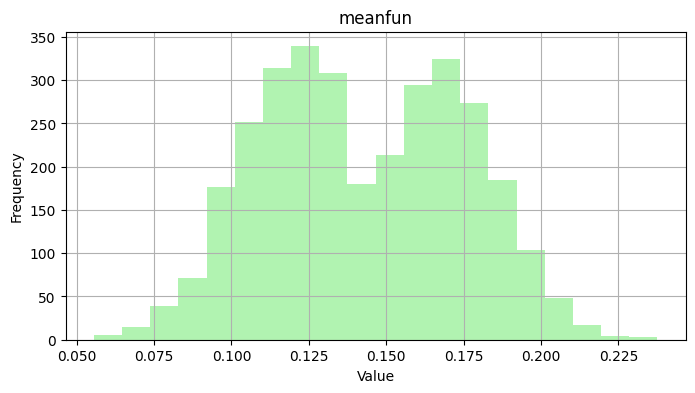

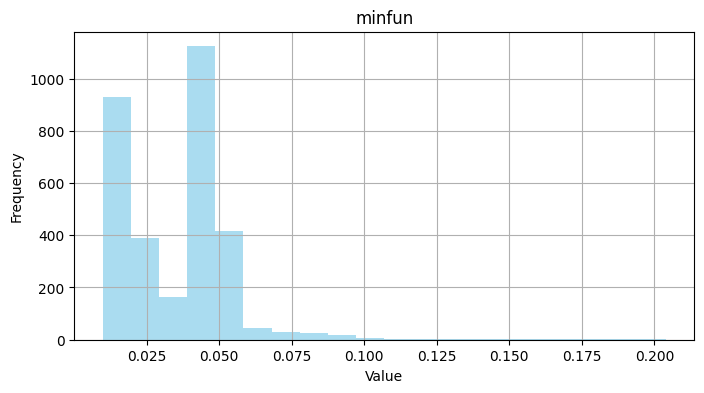

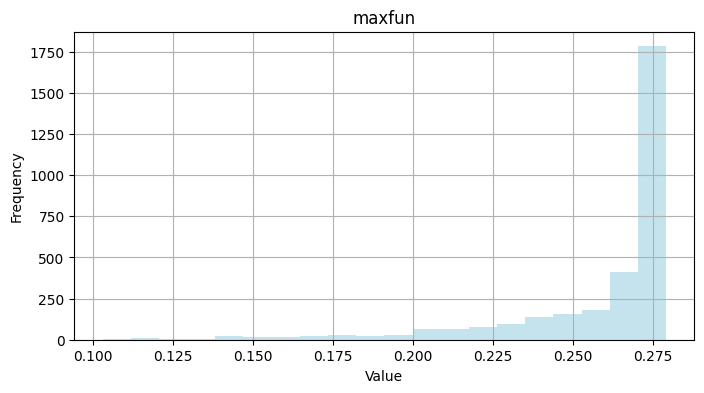

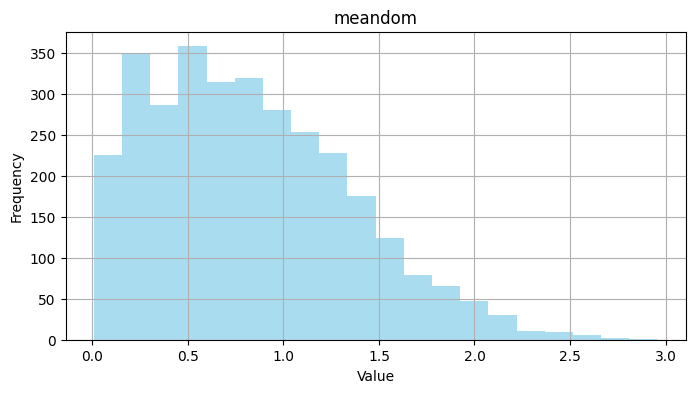

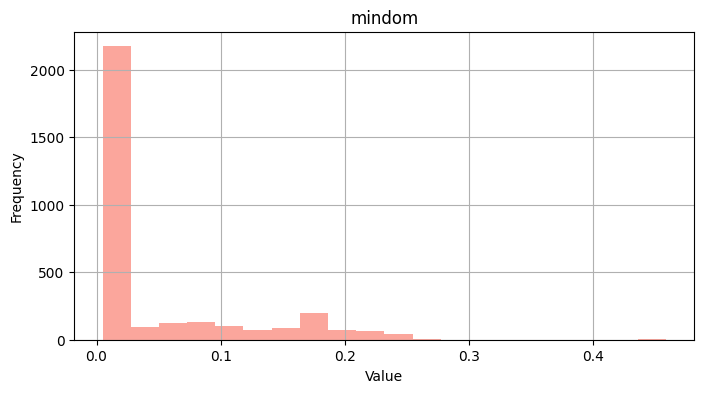

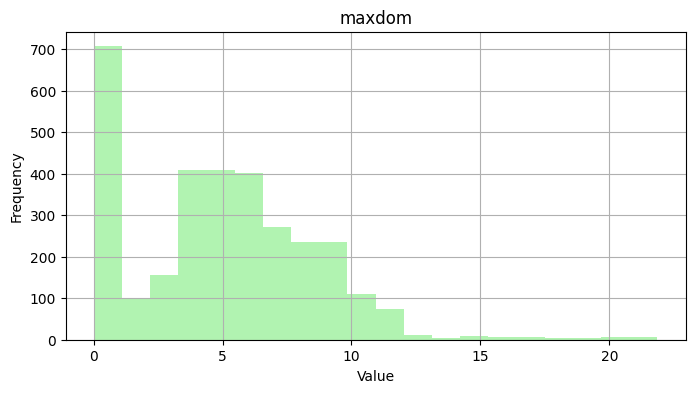

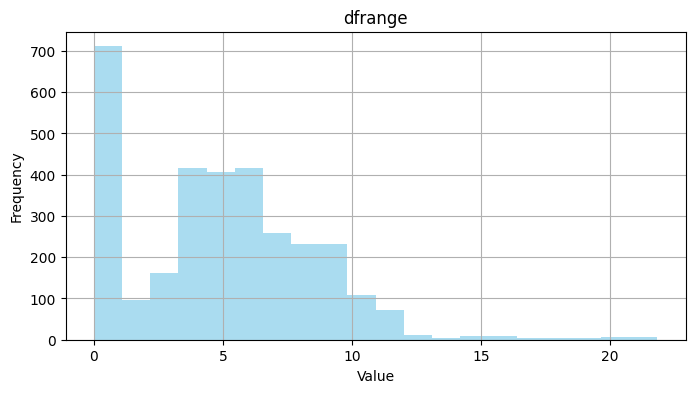

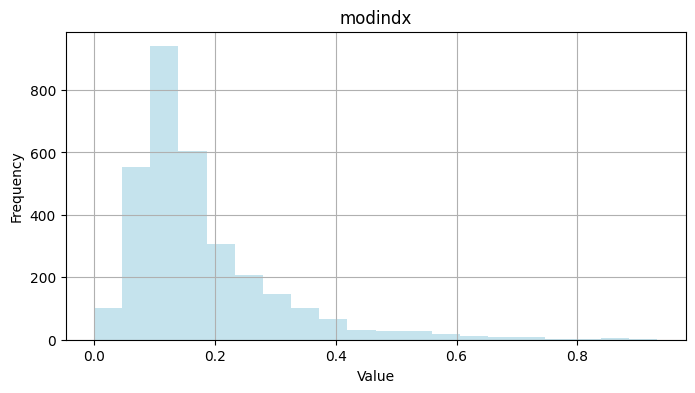

In [ ]:
#Let's see the data distribution
import matplotlib.pyplot as plt

custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'lightblue']

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 4))
    df[col].hist(color=custom_colors[i % len(custom_colors)], bins=20, alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


We can see that there are features that are not normally distributed or skwed .

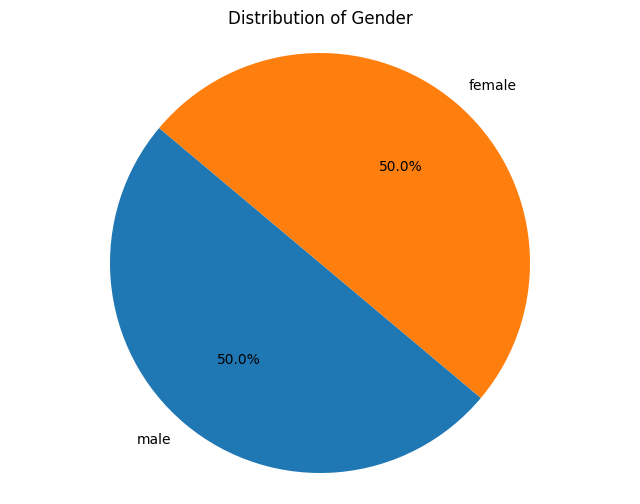

In [ ]:
# Count occurrences of each gender
gender_counts = df['label'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Gender Distribution Analysis
gender_distribution = df['label'].value_counts(normalize=True) * 100
print("Gender Distribution:")
print(gender_distribution)

Gender Distribution:
male      50.0
female    50.0
Name: label, dtype: float64


The percentage of males and females in this data in 50% for each

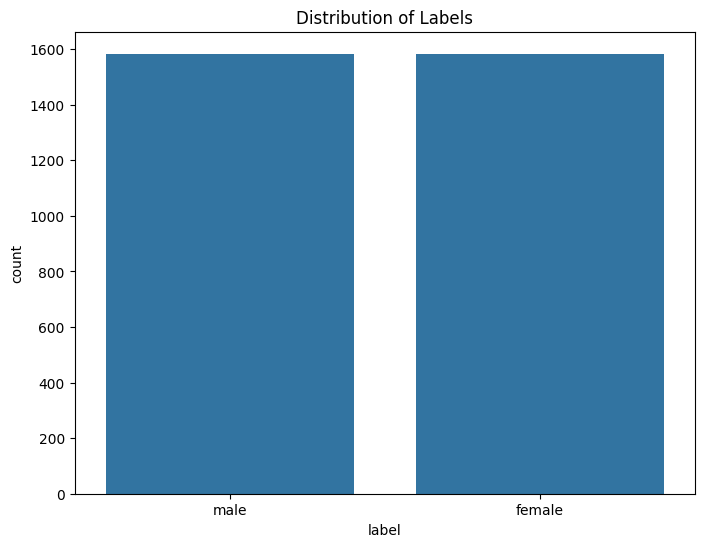

In [ ]:
#Seeing the targel or categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title("Distribution of Labels")
plt.show()

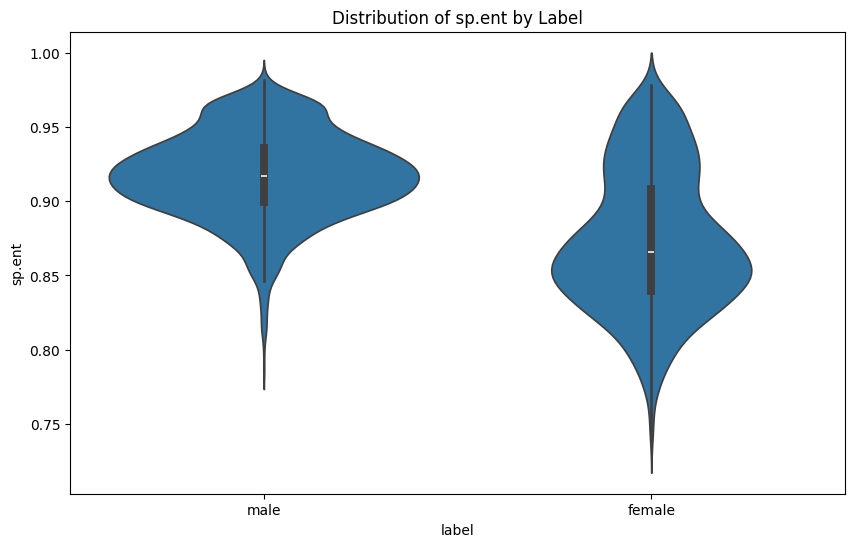

In [ ]:
#Explore the distribution of 'sp.ent' across different labels
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='sp.ent', data=df)
plt.title('Distribution of sp.ent by Label')
plt.show()

it's clear that males have a higher sp.ent than females

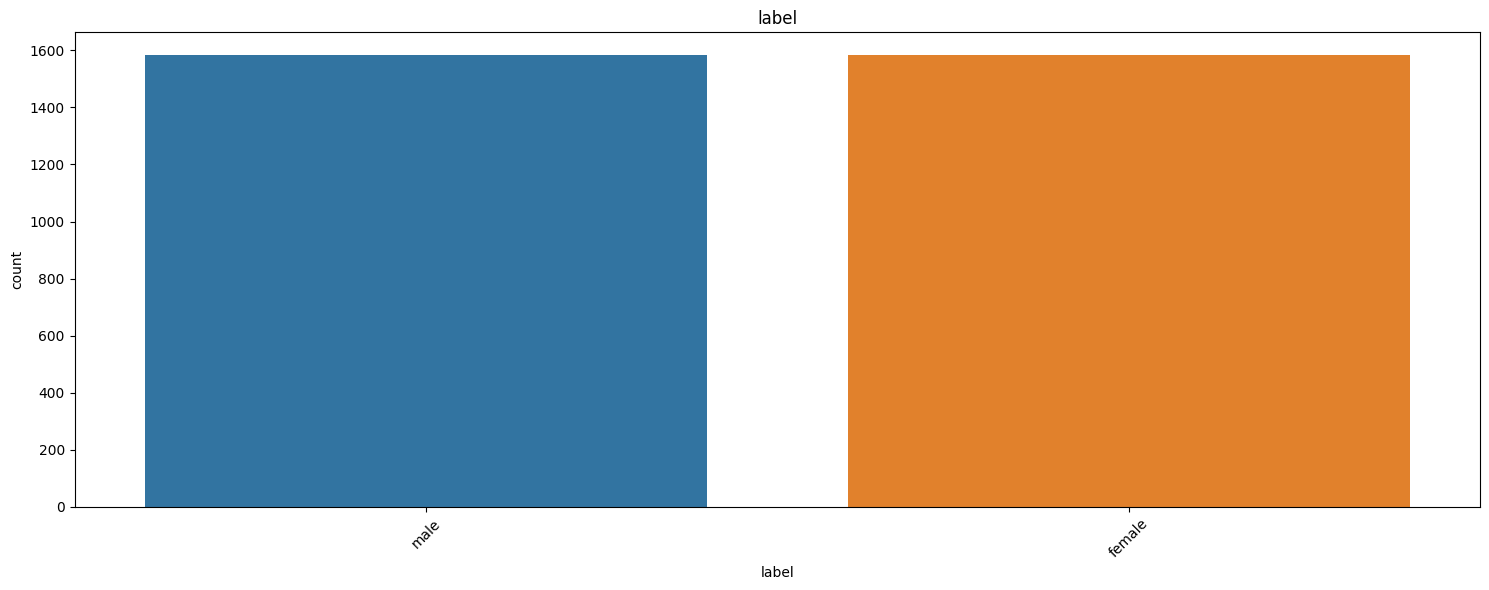

In [ ]:
#Visualize the mean 'meanfun' value for each gender.
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(x=col, hue='label', data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

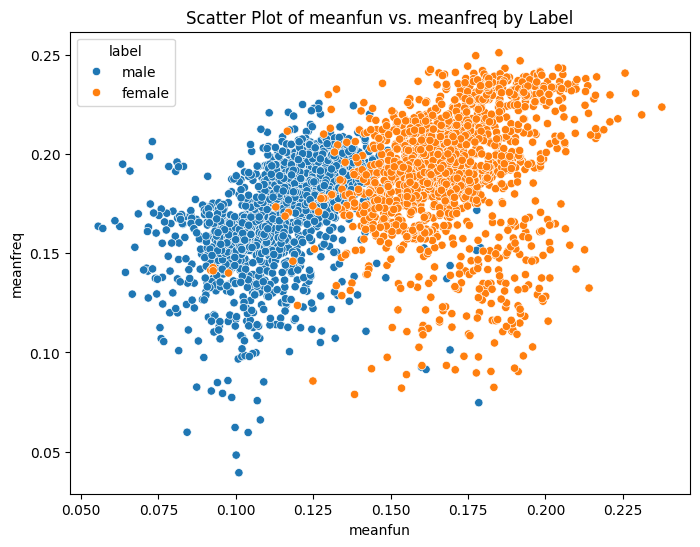

In [ ]:
#Visualize the relationship between 'meanfun' and 'meanfreq'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='meanfun', y='meanfreq', hue='label', data=df)
plt.title('Scatter Plot of meanfun vs. meanfreq by Label')
plt.show()


since the meanfreq is the mean of the voice signal while the meanfun is the pitch of the voice then it is normal to see that by increasing the meanfun(pith) the female percentage increanse and vice versa.

the mean in the female here is higher than males.

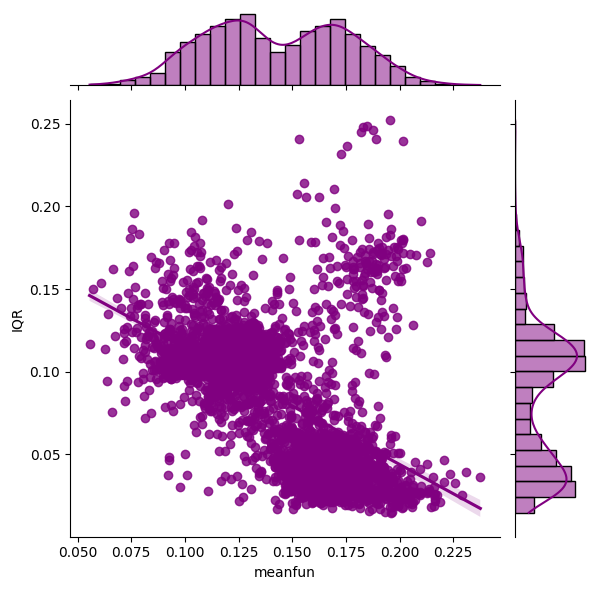

In [ ]:
sns.jointplot(x='meanfun', y='IQR', data=df, kind='reg', color='purple')
plt.show()


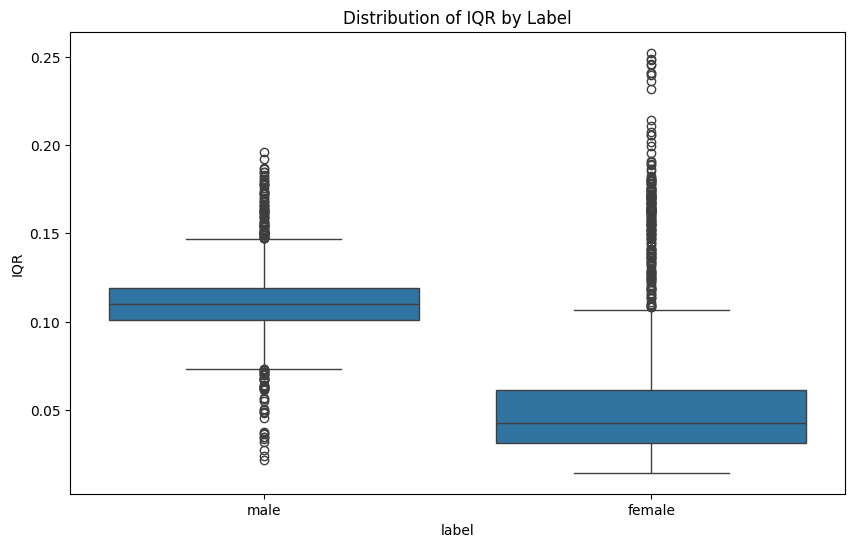

In [ ]:
#Explore the distribution of 'IQR' across different labels.
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='IQR', data=df)
plt.title('Distribution of IQR by Label')
plt.show()

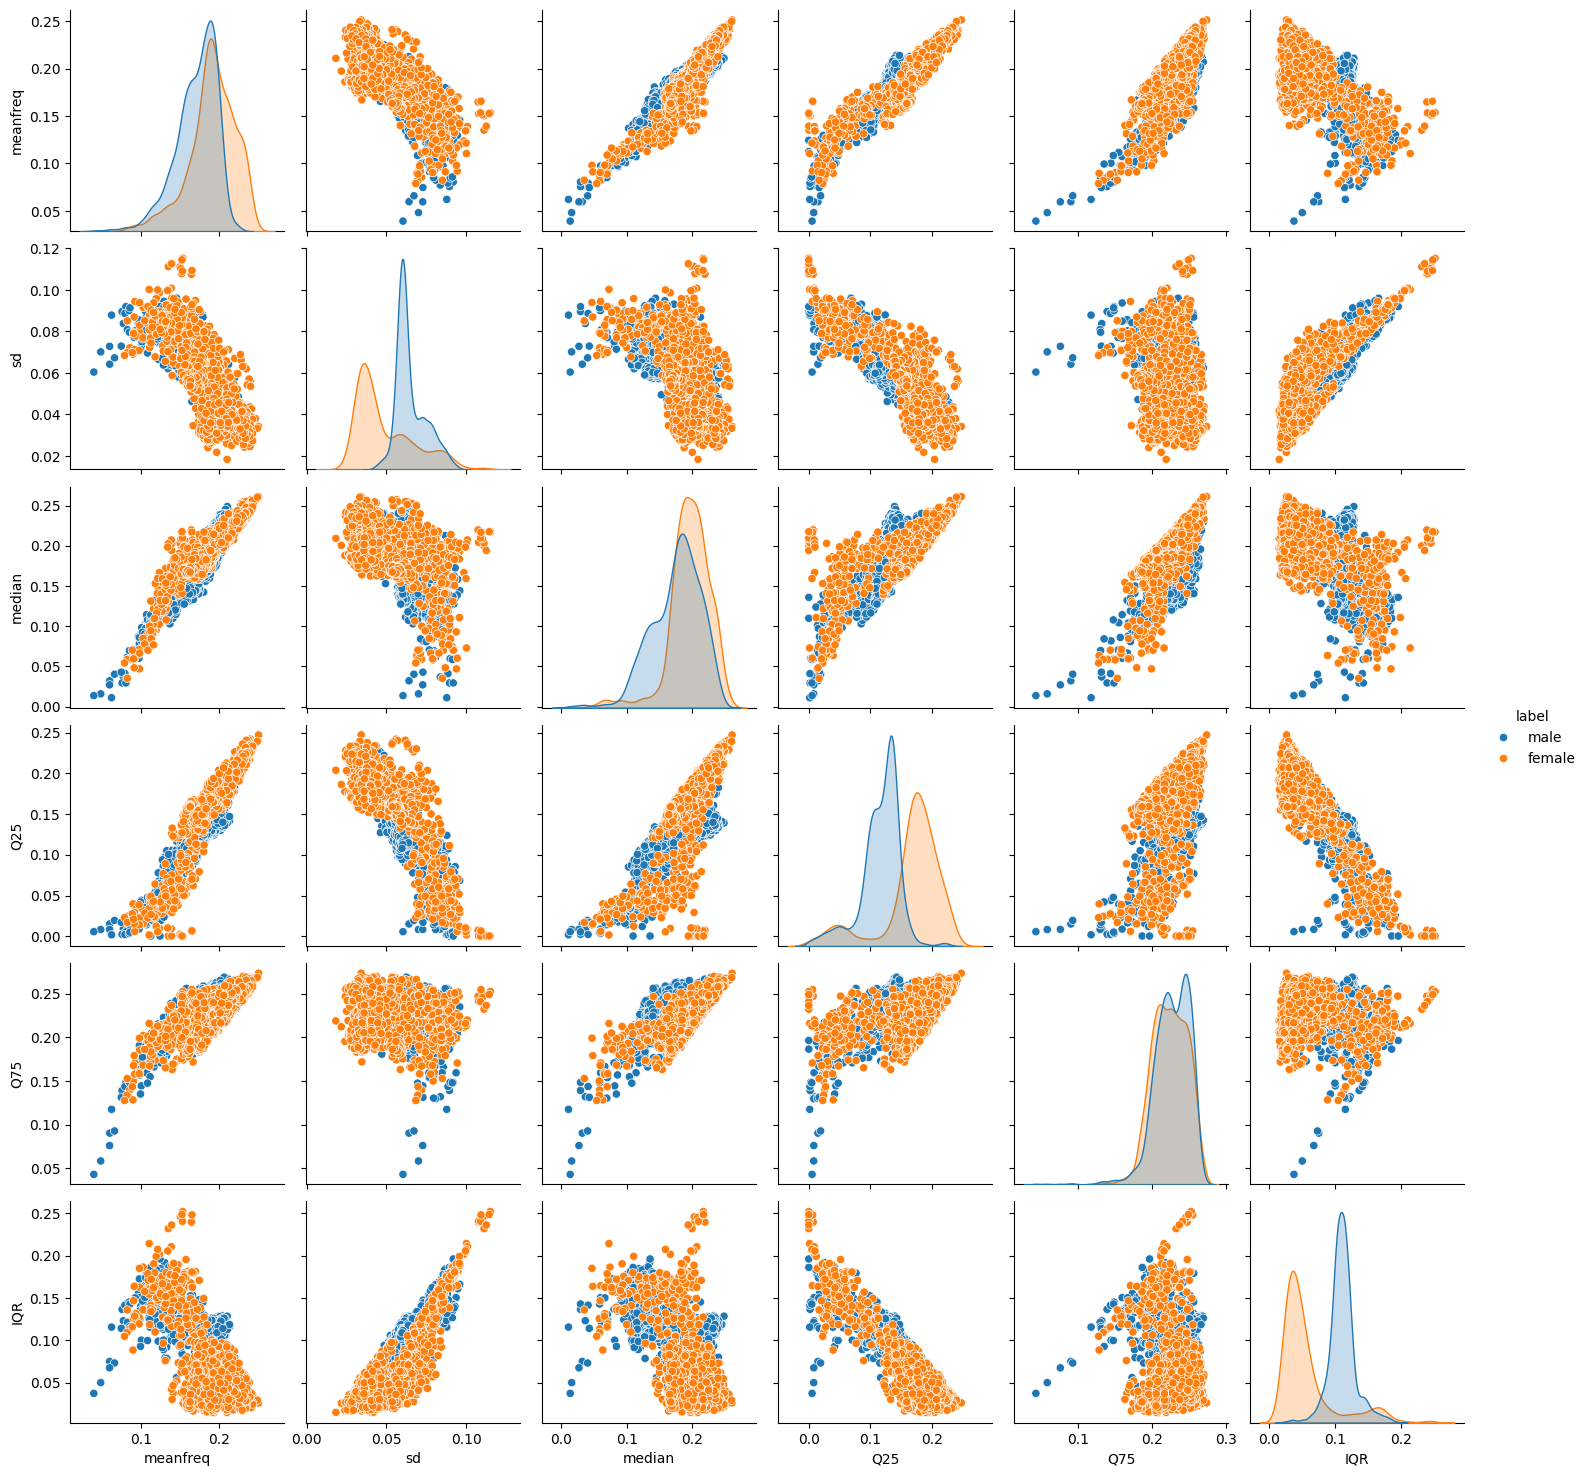

In [ ]:
#Visualize relationships between a subset of numerical features.
sns.pairplot(df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'label']], hue='label', diag_kind='kde')
plt.show()


In [ ]:
# Statistical Tests
statistical_tests = {}
for col in numerical_columns:
    male_values = df[df['label'] == 'male'][col]
    female_values = df[df['label'] == 'female'][col]
    t_statistic, p_value = ttest_ind(male_values, female_values)
    statistical_tests[col] = {'t_statistic': t_statistic, 'p_value': p_value}

print("\nStatistical Tests:")
for col, results in statistical_tests.items():
    print(f"{col}: t-statistic = {results['t_statistic']:.4f}, p-value = {results['p_value']:.4f}")


Statistical Tests:
meanfreq: t-statistic = -20.1681, p-value = 0.0000
sd: t-statistic = 30.7484, p-value = 0.0000
median: t-statistic = -16.6610, p-value = 0.0000
Q25: t-statistic = -33.4898, p-value = 0.0000
Q75: t-statistic = 3.7731, p-value = 0.0002
IQR: t-statistic = 44.3368, p-value = 0.0000
skew: t-statistic = 2.0623, p-value = 0.0393
kurt: t-statistic = 4.9250, p-value = 0.0000
sp.ent: t-statistic = 31.6750, p-value = 0.0000
sfm: t-statistic = 21.5389, p-value = 0.0000
mode: t-statistic = -9.8111, p-value = 0.0000
centroid: t-statistic = -20.1681, p-value = 0.0000
meanfun: t-statistic = -85.0223, p-value = 0.0000
minfun: t-statistic = -7.7642, p-value = 0.0000
maxfun: t-statistic = -9.4988, p-value = 0.0000
meandom: t-statistic = -10.9526, p-value = 0.0000
mindom: t-statistic = -11.1853, p-value = 0.0000
maxdom: t-statistic = -11.2260, p-value = 0.0000
dfrange: t-statistic = -11.0208, p-value = 0.0000
modindx: t-statistic = 1.7339, p-value = 0.0830


t-value is a way to quantify the difference between the population means

p-value is the probability of obtaining a t-value with an absolute value

If the p-value is less than a chosen significance level (usually denoted as α, commonly set to 0.05), then the null hypothesis is rejected,


(null hypothesis => there is no difference in the population means of the two groups.


Feature Importance (Mutual Information):
meanfun     0.561629
IQR         0.454414
Q25         0.406048
sd          0.302533
sp.ent      0.178727
mode        0.176640
sfm         0.130442
centroid    0.108916
meanfreq    0.108916
mindom      0.098725
median      0.082248
maxdom      0.072655
dfrange     0.071212
skew        0.068299
kurt        0.047606
meandom     0.045426
maxfun      0.033429
minfun      0.025941
Q75         0.015569
modindx     0.008635
dtype: float64


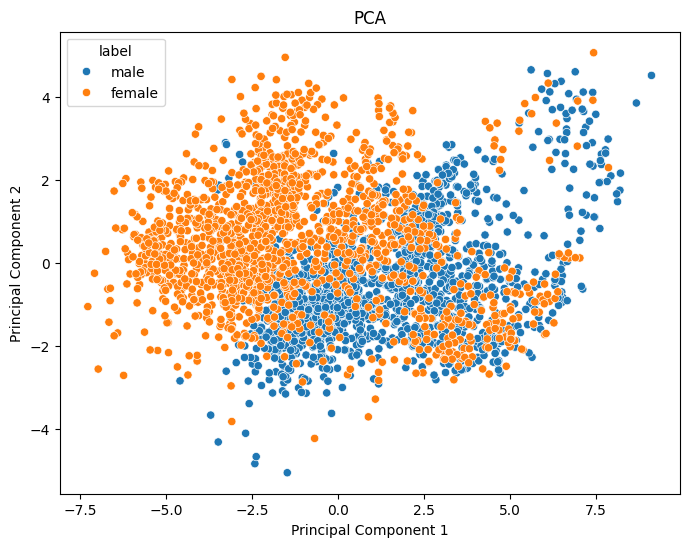

In [ ]:
# Dimensionality Reduction
X = df.drop(columns=['label'])
y = df['label']
mi_scores = mutual_info_classif(X, y)
print("\nFeature Importance (Mutual Information):")
print(pd.Series(mi_scores, index=X.columns).sort_values(ascending=False))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

mutual_info_classif function, which calculates the mutual information between each feature and the target variable.

**meanfun**: This feature has the highest mutual information score, indicating that it is the most informative or important feature for predicting the target variable.

as we can see that:

**Highly Informative Features:**

Features with higher mutual information scores, such as meanfun, IQR, Q25, sd, and sp.ent, are crucial for predicting gender.
meanfun (mean fundamental frequency) appears to be the most informative feature, followed by IQR (interquartile range) and Q25 (first quantile).

**Less Informative Features:**

Features with lower mutual information scores, such as modindx, Q75, minfun, and maxfun, contribute less to the prediction of gender and may have limited discriminatory power.

**Potential Redundancy:**

Some features may exhibit high mutual information scores but could be correlated with other informative features. Further analysis, such as examining pairwise correlations, can help identify redundant features.
Feature Selection:

Based on these scores, we can prioritize the most informative features for model training and feature selection. It may be beneficial to focus on a subset of features with the highest mutual information scores to simplify the model and improve interpretability.

**Model Performance:**

Incorporating highly informative features identified through mutual information into predictive models is likely to improve their performance in gender classification tasks. Features with lower mutual information scores may be considered for removal or further investigation to assess their contribution to the model.

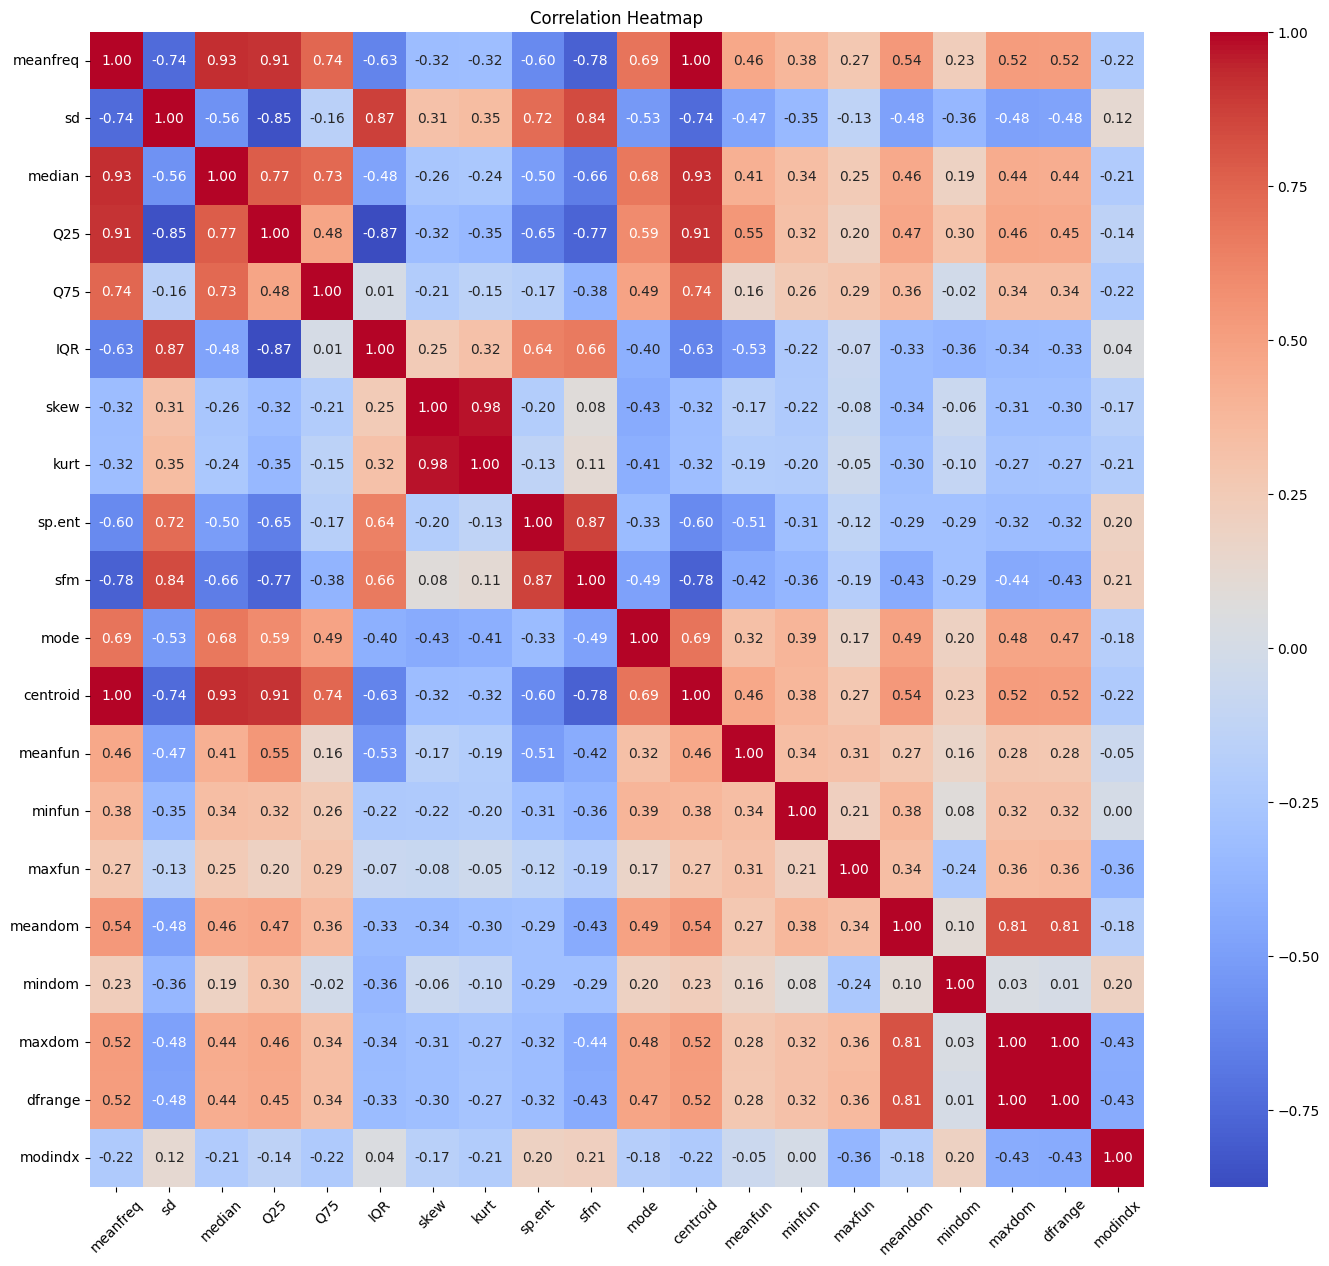

In [ ]:
#Let's see the correlation
plt.figure(figsize=(17,15 ))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

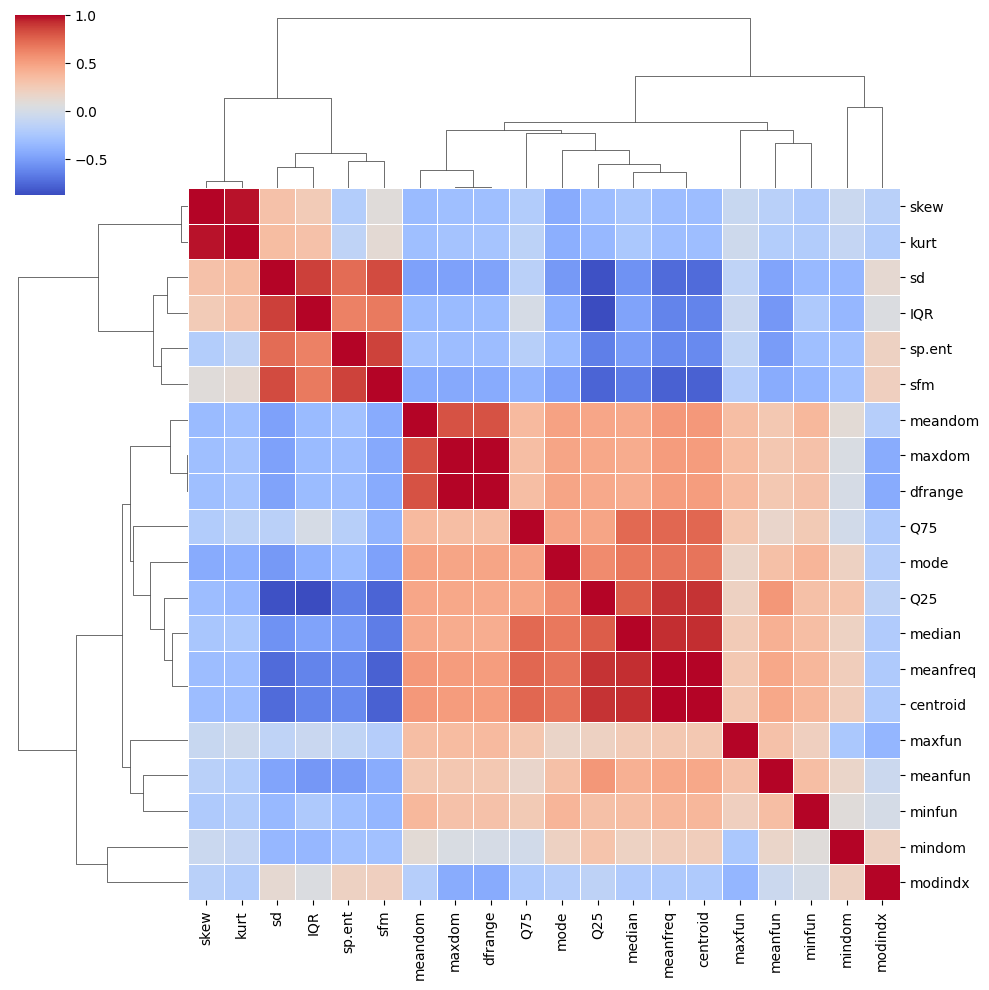

In [ ]:
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.show()

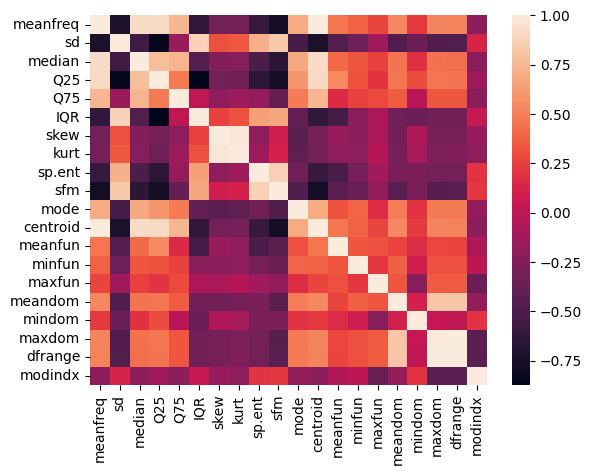

In [ ]:
sns.heatmap(df.corr())
plt.show()

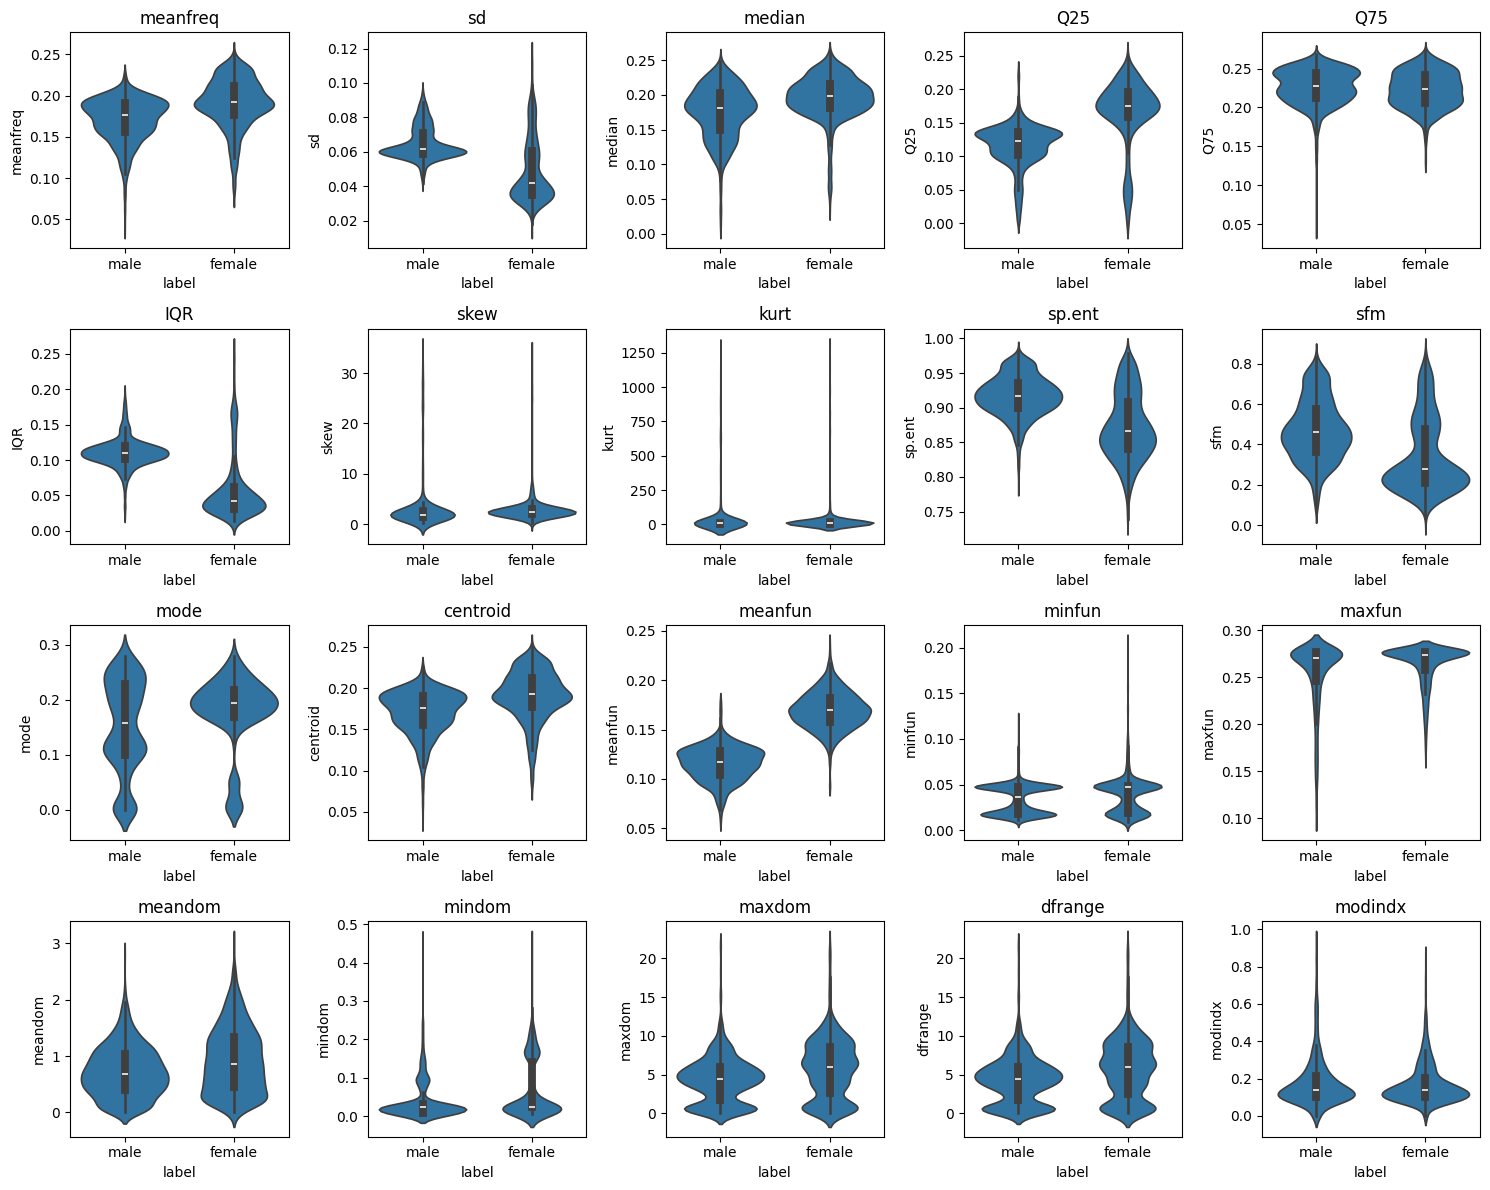

In [ ]:
#using the violinplot showing the data
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 5, i + 1)
    sns.violinplot(x='label', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


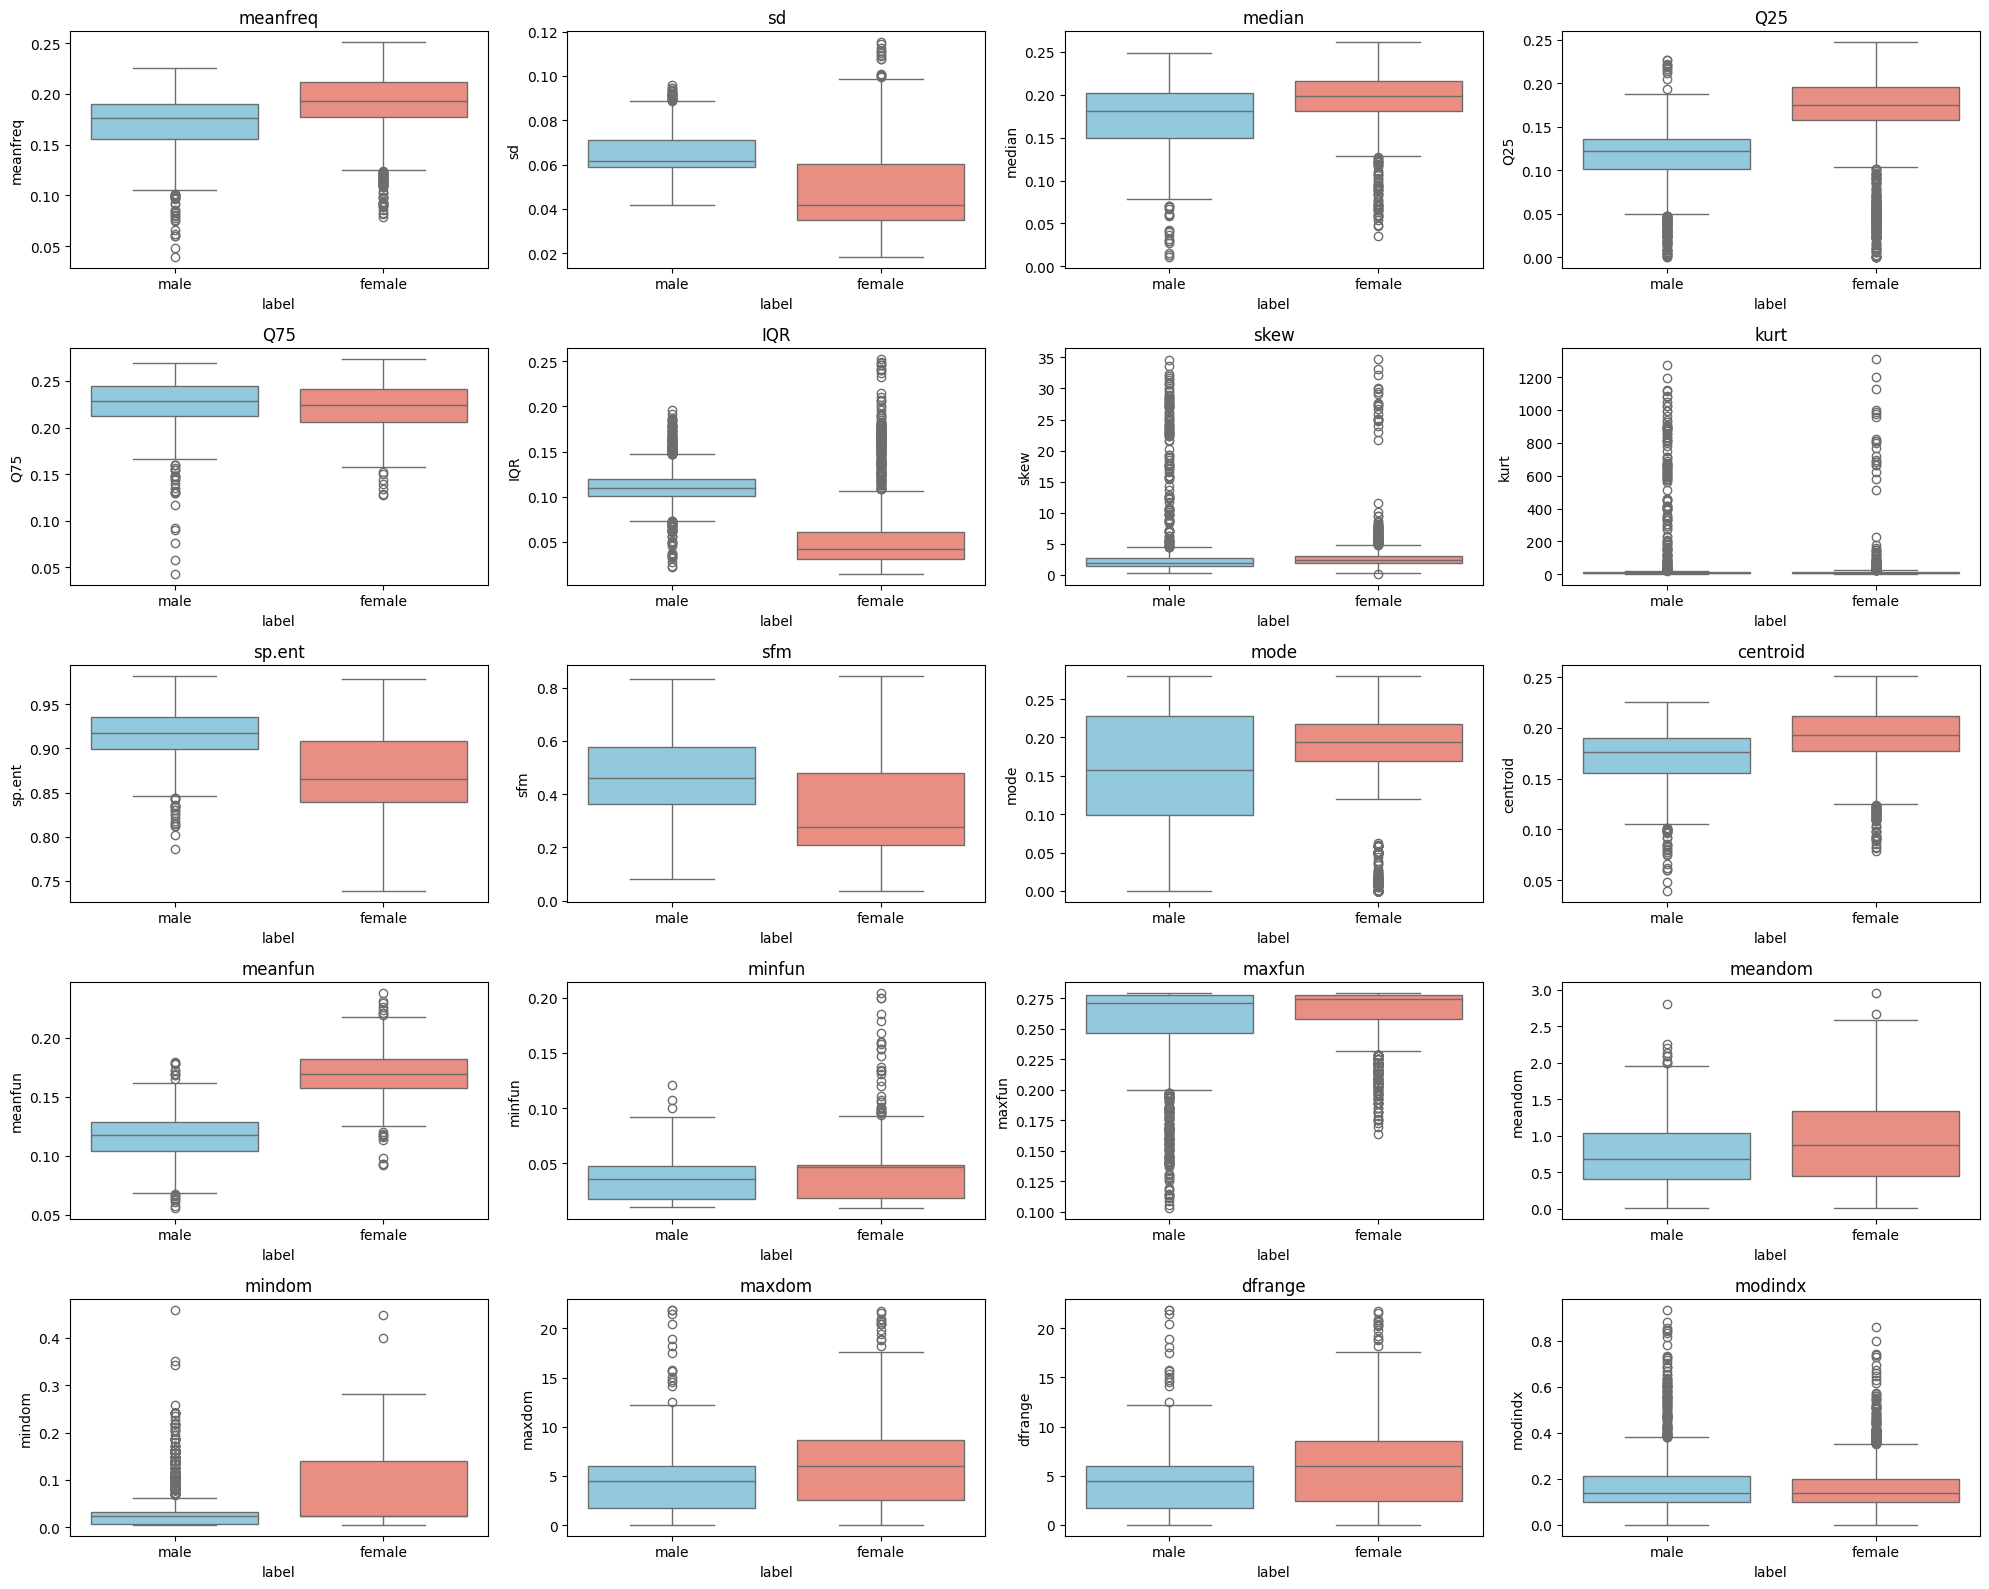

In [ ]:
#let's see the boxplot
# Define custom colors for the box plots
custom_colors = ['skyblue', 'salmon']

plt.figure(figsize=(20, 16))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x='label', y=col, data=df, palette=custom_colors)
    plt.title(col)
plt.tight_layout()
plt.show()



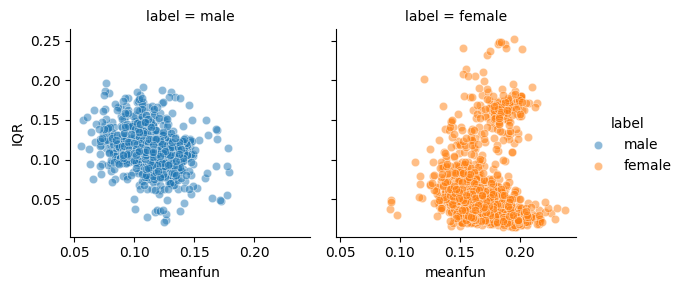

In [ ]:
#Create a facet grid to compare multiple features at once, separated by gender
g = sns.FacetGrid(df, col='label', hue='label')
g.map(sns.scatterplot, 'meanfun', 'IQR', alpha=0.5)
g.add_legend()
plt.show()

#Observations

Okay after analysis we have seen the following:

 -The target is the label column and this column equal percentage of males and females.

 -There are features that need to be normally distributed.

 -There might be a need for scaling.

 -The outliers in the data i think it's logical as there are females with high pitch in voice this means that humans have different tone voices so i think it's logical!

 -We can also make feature selection as we have 21 column (20 feature,1 target)
 we will see soon.

 -also the features are all numerical except the target.

 -we will see which model we will use to deal with these outliers.

 Let's go for processing and modeling the data.


#Pre-processing

In [ ]:
#Let's check the null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

There are no nulls , that's Great! ✔

In [ ]:
#Let's check the duplicates
df.duplicated().sum()

2

There are 2 duplicated rows in this data we can deal with this by removing them as they are very small values compared with the number of rows in the data

In [ ]:
df = df.drop_duplicates()

In [ ]:
#checking duplicates after removing
df.duplicated().sum()

0

Duplicates are done ✔

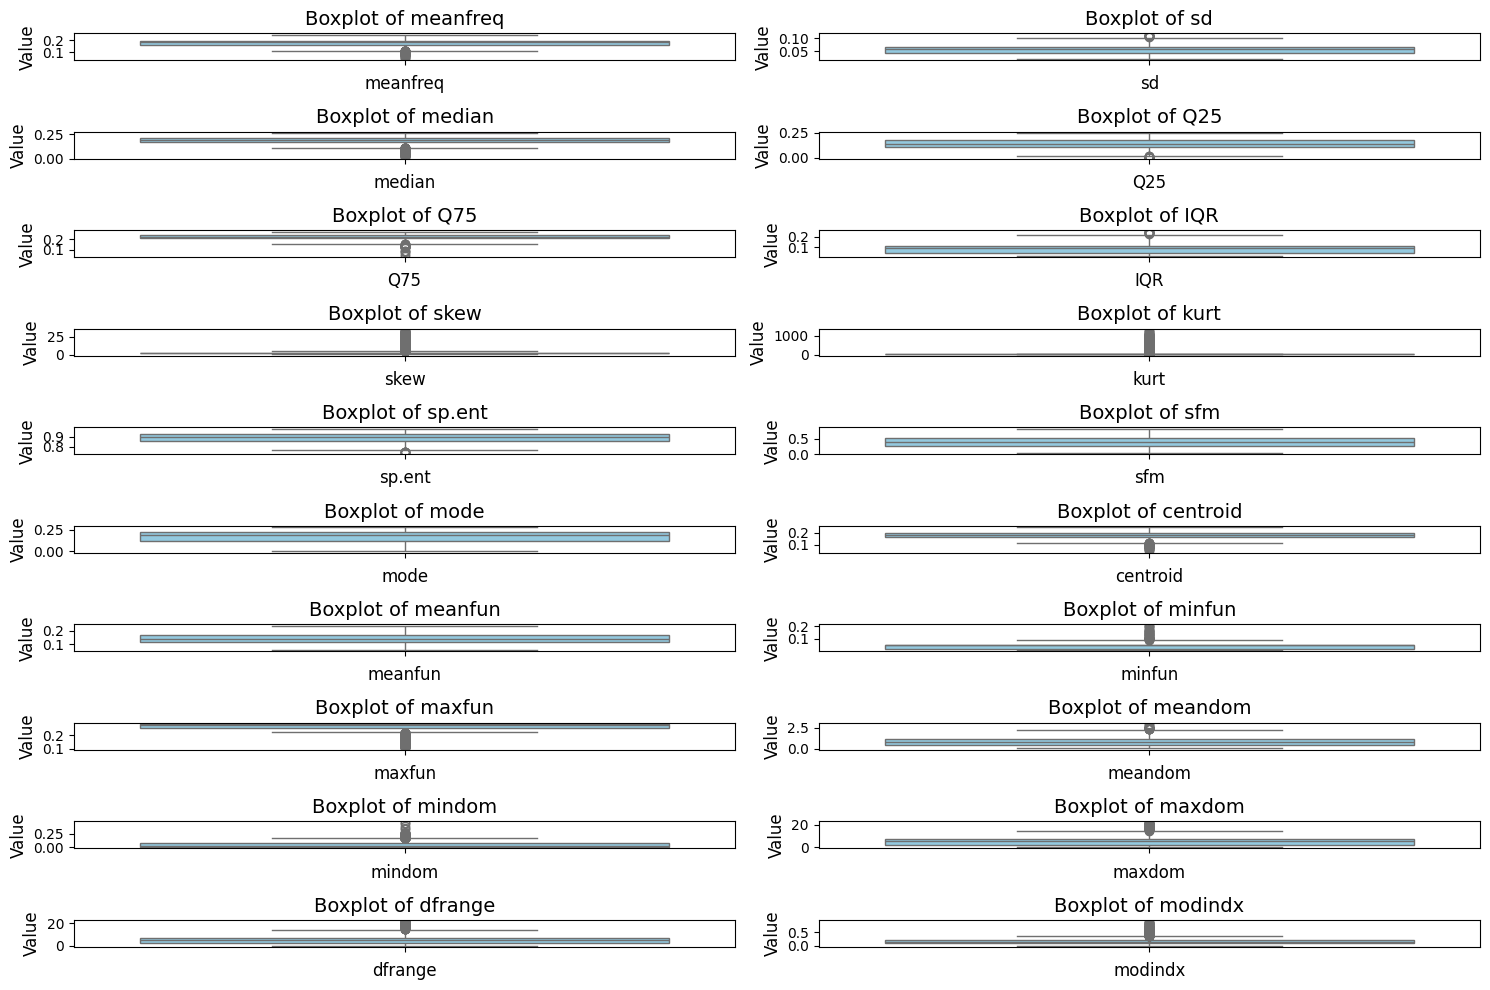

In [ ]:


# Get numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 2 + 1  # Calculate the number of rows needed
num_cols = 2  # Two columns for each row

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust subplot layout dynamically
    sns.boxplot(df[col], color='skyblue')  # Customize color as needed
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Remove empty subplots if any
for i in range(num_plots, num_rows * num_cols):
    plt.delaxes(plt.gca())

plt.tight_layout()
plt.show()



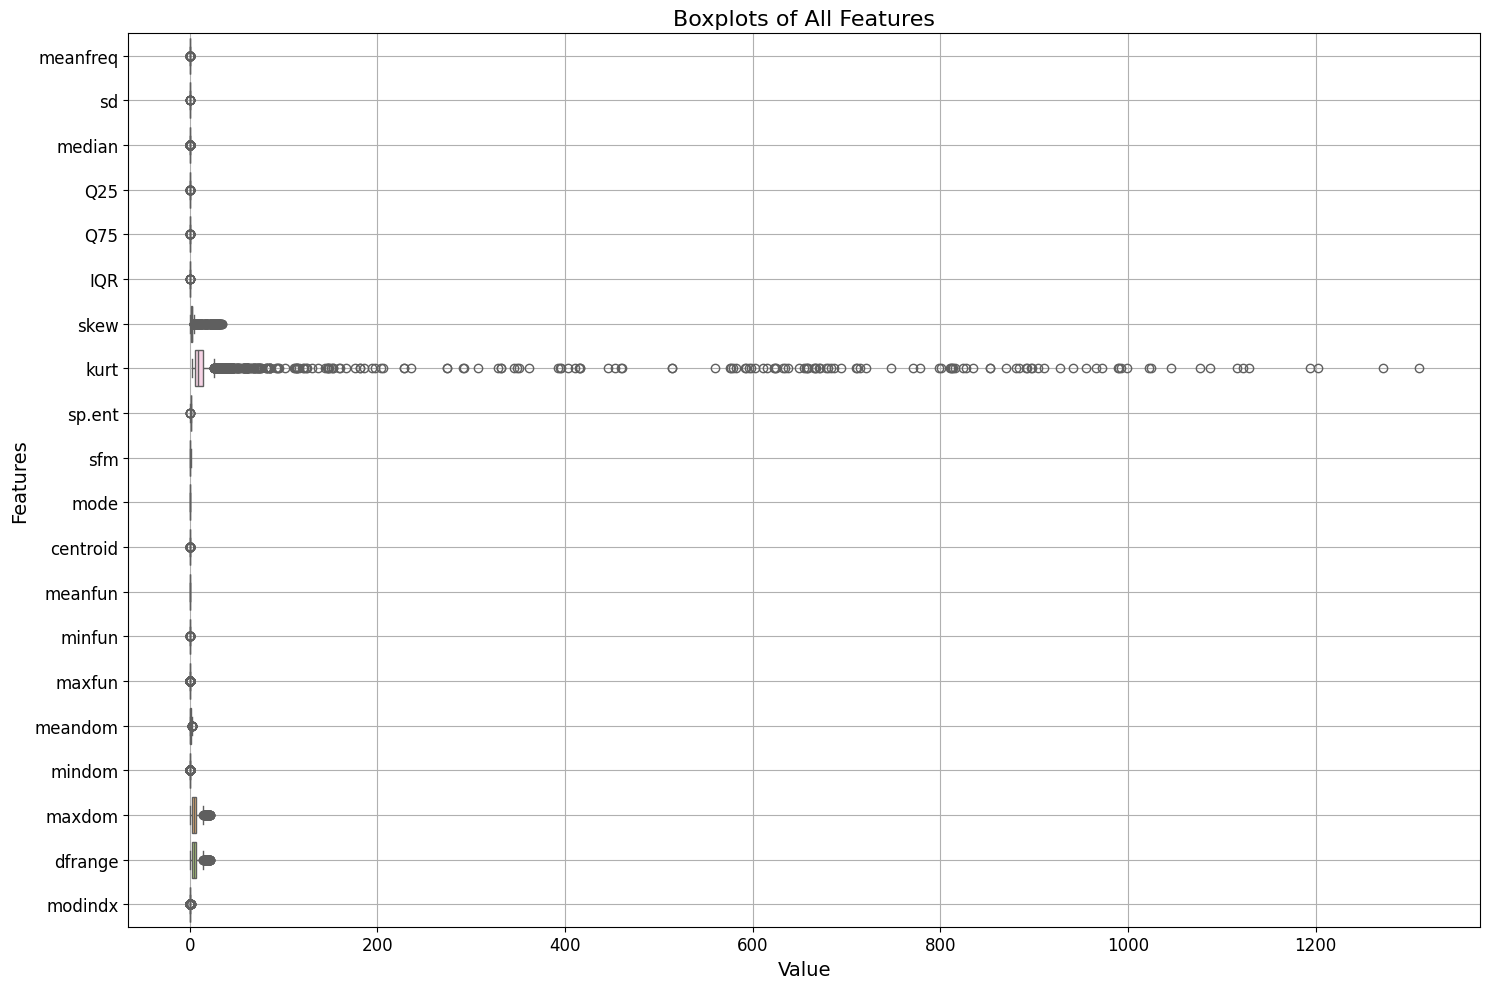

In [ ]:

# Create boxplots for all numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set3")
plt.title('Boxplots of All Features', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




we can see that there are outliers in the dataset but as we said before it's logical so we will do nothing with them.

In [ ]:
#encoding for the categorical colmn
df['label'].replace(to_replace="male",value="0",inplace=True)
df['label'].replace(to_replace="female",value="1",inplace=True)
df['label'] = df['label'].astype(int)

In [ ]:
#Checking the datatypes after encoding
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int64
dtype: object

Encoding done ✔

In [ ]:
#Let's see the numerical values of distribution
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df)
# Print the test result
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The data looks Gaussian (normally distributed)")
else:
    print("The data does not look Gaussian (not normally distributed)")

Shapiro-Wilk Test:
Test Statistic: 0.04132235050201416
P-value: 0.0
The data does not look Gaussian (not normally distributed)


In [ ]:

for column in df.select_dtypes(include=np.number).columns:
    # Shapiro-Wilk test
    stat, p_value = shapiro(df[column])
    print(f'{column} - Shapiro-Wilk Test - Statistic: {stat}, P-value: {p_value}')

meanfreq - Shapiro-Wilk Test - Statistic: 0.9760729074478149, P-value: 1.1735469692769933e-22
sd - Shapiro-Wilk Test - Statistic: 0.969030499458313, P-value: 1.341345679908853e-25
median - Shapiro-Wilk Test - Statistic: 0.9467996954917908, P-value: 2.1648541670428568e-32
Q25 - Shapiro-Wilk Test - Statistic: 0.9778462052345276, P-value: 8.138346511367241e-22
Q75 - Shapiro-Wilk Test - Statistic: 0.954399049282074, P-value: 2.271074269856465e-30
IQR - Shapiro-Wilk Test - Statistic: 0.9424867630004883, P-value: 1.938099433325116e-33
skew - Shapiro-Wilk Test - Statistic: 0.38498836755752563, P-value: 0.0
kurt - Shapiro-Wilk Test - Statistic: 0.2311234474182129, P-value: 0.0
sp.ent - Shapiro-Wilk Test - Statistic: 0.976632297039032, P-value: 2.1365493610876503e-22
sfm - Shapiro-Wilk Test - Statistic: 0.9663290977478027, P-value: 1.3575732266565897e-26
mode - Shapiro-Wilk Test - Statistic: 0.9051156044006348, P-value: 1.3754585206426674e-40
centroid - Shapiro-Wilk Test - Statistic: 0.97607290

the columns that are not norally distributed are:

-skew

-kurt

-minfun

-maxfun

-mindom

-modindx

-label

We saw before visually in the analysis that the data is not normally distributed and here numerically shapiro confirmed that it is not N.D
Let's see how we will deal with them.

In [ ]:
#Let's go to see the skewness but in a numerical values
df.skew()

meanfreq   -0.616720
sd          0.136343
median     -1.013090
Q25        -0.490297
Q75        -0.900129
IQR         0.295525
skew        4.931605
kurt        5.870593
sp.ent     -0.431897
sfm         0.340159
mode       -0.836569
centroid   -0.616720
meanfun     0.038785
minfun      1.877917
maxfun     -2.237947
meandom     0.611174
mindom      1.662172
maxdom      0.723140
dfrange     0.725153
modindx     2.064099
label       0.000000
dtype: float64

In [ ]:
skewness = df.skew()
skewed_columns = skewness[skewness.abs() > 1].index.tolist()
print("Skewed columns:")
print(skewed_columns)


Skewed columns:
['median', 'skew', 'kurt', 'minfun', 'maxfun', 'mindom', 'modindx']


we saw the skewness let's see also the correlation for feature selection.

In [ ]:
# Calculate correlation between features and target variable
correlation_with_target = df.corr()['label'].abs()

# Sort the correlations in ascending order
correlation_with_target_sorted = correlation_with_target.sort_values()

# Print the sorted correlations
print("Correlation with target variable (absolute values):")
print(correlation_with_target_sorted)


Correlation with target variable (absolute values):
modindx     0.030528
skew        0.036621
Q75         0.066791
kurt        0.087220
minfun      0.136435
maxfun      0.166263
mode        0.172109
meandom     0.190593
dfrange     0.191513
maxdom      0.194971
mindom      0.195637
median      0.284387
meanfreq    0.337660
centroid    0.337660
sfm         0.358223
sd          0.479468
sp.ent      0.490893
Q25         0.511390
IQR         0.618766
meanfun     0.834135
label       1.000000
Name: label, dtype: float64


In [ ]:
low_correlation_threshold = 0.2
low_correlation_features = correlation_with_target_sorted[correlation_with_target_sorted < low_correlation_threshold].index.tolist()
print("Features with low correlation with target variable:")
print(low_correlation_features)


Features with low correlation with target variable:
['modindx', 'skew', 'Q75', 'kurt', 'minfun', 'maxfun', 'mode', 'meandom', 'dfrange', 'maxdom', 'mindom']


In [ ]:
# Assuming df is your DataFrame containing the data
X = df.drop(columns=['label'])
y = df['label']

selector = SelectKBest(score_func=f_classif, k=16)

# Fit and transform the selector to your feature matrix (X) to select the top k features
X_selected = selector.fit_transform(X, y)

# Print selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

print("Selected features:")
print(selected_features)

Selected features:
Index(['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom',
       'maxdom', 'dfrange'],
      dtype='object')


In [ ]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
columns_to_drop = ['Q75', 'modindx', 'skew', 'kurt']
df.drop(columns=columns_to_drop, inplace=True)
print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom',
       'maxdom', 'dfrange', 'label'],
      dtype='object')


Feature selection is done ✔

Let's search for the negative and zero values to know which type of transformation to use.

In [ ]:
for column in df.columns:
    # Count the number of zero values in the current column
    zero_count = (df[column] == 0).sum()

    # Print the column name and the count of zero values
    print(f"Number of zero values in column '{column}': {zero_count}")

Number of zero values in column 'meanfreq': 0
Number of zero values in column 'sd': 0
Number of zero values in column 'median': 0
Number of zero values in column 'Q25': 0
Number of zero values in column 'IQR': 0
Number of zero values in column 'sp.ent': 0
Number of zero values in column 'sfm': 0
Number of zero values in column 'mode': 236
Number of zero values in column 'centroid': 0
Number of zero values in column 'meanfun': 0
Number of zero values in column 'minfun': 0
Number of zero values in column 'maxfun': 0
Number of zero values in column 'meandom': 0
Number of zero values in column 'mindom': 0
Number of zero values in column 'maxdom': 0
Number of zero values in column 'dfrange': 65
Number of zero values in column 'label': 1583


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
for column in df.columns:
    # Count the number of negative values in the current column
    negative_count = (df[column] < 0).sum()

    # Print the column name and the count of negative values
    print(f"Number of negative values in column '{column}': {negative_count}")


Number of negative values in column 'meanfreq': 0
Number of negative values in column 'sd': 0
Number of negative values in column 'median': 0
Number of negative values in column 'Q25': 0
Number of negative values in column 'IQR': 0
Number of negative values in column 'sp.ent': 0
Number of negative values in column 'sfm': 0
Number of negative values in column 'mode': 0
Number of negative values in column 'centroid': 0
Number of negative values in column 'meanfun': 0
Number of negative values in column 'minfun': 0
Number of negative values in column 'maxfun': 0
Number of negative values in column 'meandom': 0
Number of negative values in column 'mindom': 0
Number of negative values in column 'maxdom': 0
Number of negative values in column 'dfrange': 0
Number of negative values in column 'label': 0


Okay the data doesnot have a negative value but it contains zero values so the log transform will not be applicable we can try the sqr transform .

In [ ]:
columns_to_transform = [col for col in df.columns if col != 'label']
df[columns_to_transform] = df[columns_to_transform].applymap(lambda x: np.pr(x) if x >= 0 else np.nan)
df

meanfreq        sd    median       Q25       IQR    sp.ent       sfm  \
0     0.244502  0.253459  0.178961  0.122766  0.274084  0.945182  0.701368   
1     0.256922  0.259442  0.200571  0.139334  0.270652  0.944560  0.716745   
2     0.278057  0.289533  0.191621  0.093279  0.351008  0.919994  0.692030   
3     0.388881  0.268534  0.397506  0.310776  0.333727  0.981490  0.852779   
4     0.367587  0.281329  0.353067  0.280571  0.356826  0.985878  0.885194   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.363158  0.291091  0.392055  0.222002  0.389691  0.981292  0.873603   
3164  0.340912  0.298699  0.277052  0.206682  0.402732  0.980161  0.842360   
3165  0.376904  0.309513  0.428639  0.182822  0.436963  0.973064  0.808824   
3166  0.379023  0.301045  0.430089  0.208586  0.420041  0.974903  0.821870   
3167  0.406828  0.304768  0.427836  0.264710  0.425154  0.968932  0.775583   

          mode  centroid   meanfun    minfun    maxfun   meandom    mindom  \
0     0.000000  0.244502  0.290309  0.125306  0.525226  0.088388  0.088388   
1     0.000000  0.256922  0.328537  0.125801  0.500000  0.094944  0.088388   
2     0.000000  0.278057  0.314176  0.125122  0.520756  0.089387  0.088388   
3     0.289617  0.388881  0.298270  0.133407  0.500000  0.448885  0.088388   
4     0.322895  0.367587  0.326187  0.130120  0.516398  0.844282  0.088388   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.448147  0.363158  0.427539  0.289430  0.512148  0.912633  0.088388   
3164  0.116974  0.340912  0.434718  0.185496  0.525226  0.953864  0.197642   
3165  0.089475  0.376904  0.458168  0.198762  0.525226  0.703044  0.088388   
3166  0.460654  0.379023  0.415181  0.185695  0.500000  0.889584  0.088388   
3167  0.517399  0.406828  0.430821  0.249513  0.520756  0.476468  0.088388   

        maxdom   dfrange  label  
0     0.088388  0.000000      0  
1     0.233854  0.216506      0  
2     0.125000  0.088388      0  
3     0.750000  0.744773      0  
4     2.341874  2.340206      0  
...        ...       ...    ...  
3163  2.052057  2.050152      1  
3164  1.918251  1.908042      1  
3165  1.713914  1.711633      1  
3166  1.895719  1.893657      1  
3167  0.744773  0.739510      1  

[3166 rows x 17 columns]

Skewness is done ✔

Final step in my processing is the scaling⚡.

In [ ]:

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Scaling is done ✔

#Modeling

Finally the modeling phase!🚀 ,  we have concluded from the analysis that our data encludes outliers which are real outliers as the voice pitch of everyone vary from the other so we will choose models based on our conclusion .

##RANDOMFORESTS MODEL

In [ ]:


# Assuming X and y are your feature matrix and target variable respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
model = RandomForestClassifier()

# Use RFE for feature selection on the training set
rfe = RFE(estimator=model, n_features_to_select=15)
X_train_selected = rfe.fit_transform(X_train, y_train)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Apply feature selection to the test set
X_test_selected = rfe.transform(X_test)

# Evaluate the model on the test set
accuracy = model.score(X_train_selected, y_train)
print(f"Model Accuracy on Train Set: {accuracy}")
accuracy = model.score(X_test_selected, y_test)
print(f"Model Accuracy on Test Set: {accuracy}")



Model Accuracy on Train Set: 1.0
Model Accuracy on Test Set: 0.9794952681388013


##SVM MODEL

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # Import the SVC class from sklearn.svm



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = svm_model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = svm_model.predict(X_test_scaled)

# Calculate training and test accuracies
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display the accuracies and classification reports
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.9774881516587678
Testing Accuracy: 0.9747634069400631

Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1251
           1       0.98      0.98      0.98      1281

    accuracy                           0.98      2532
   macro avg       0.98      0.98      0.98      2532
weighted avg       0.98      0.98      0.98      2532


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       332
           1       0.97      0.97      0.97       302

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



# Credits:

This notebook is created by [Connect X]((https://www.linkedin.com/company/connectx23/)
AI team.

-------------------------------------------

**Directed by:**

AI team director [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett/)

**Team leader:**

* [Ahmed Wahdan](https://www.linkedin.com/in/ahmed-wahdan-b57ba9248)

**Team members**

 * [Ismail Gamal](https://www.linkedin.com/in/ismail-gamal-853436272)

 * [Farah Safwat](https://www.linkedin.com/in/farah-safwat-42b77224a)

 * [Moahammed Mostafa](https://www.linkedin.com/in/mohammed-mostafa237/)

 * [Sama Sameh](https://www.linkedin.com/in/sama-sameh-b234912ba)

 * [Mohamed Mahran](https://www.linkedin.com/in/mohamed-mahran-002b9b24b/)
